In [1]:
from astropy.io import fits
import astropy.constants as c
import astropy.units as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import os
from scipy.signal import find_peaks

/Users/dennisraush/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import importlib
import util
importlib.reload(util) # run this each time util is changed, to prevent restarting kernel

<module 'util' from '/Users/dennisraush/Desktop/caltech/senior/spring/Ay-Ge 107/ay107_observation/util.py'>

## Load data

In [4]:
#dirname = '20240504'
dirname = '20240412'

In [5]:
fpaths = glob.glob(f'{dirname}/*.fits')
print(fpaths)

['20240412/red0018.fits', '20240412/blue0016.fits', '20240412/red0034.fits', '20240412/red0022.fits', '20240412/red0002.fits', '20240412/red0014.fits', '20240412/red0038.fits', '20240412/blue0036.fits', '20240412/blue0020.fits', '20240412/blue0021.fits', '20240412/blue0037.fits', '20240412/red0039.fits', '20240412/red0015.fits', '20240412/red0003.fits', '20240412/red0023.fits', '20240412/red0035.fits', '20240412/blue0017.fits', '20240412/red0019.fits', '20240412/blue0001.fits', '20240412/red0004.fits', '20240412/red0012.fits', '20240412/blue0030.fits', '20240412/blue0026.fits', '20240412/red0028.fits', '20240412/blue0006.fits', '20240412/red0008.fits', '20240412/blue0010.fits', '20240412/red0032.fits', '20240412/red0024.fits', '20240412/red0025.fits', '20240412/red0072.fits', '20240412/red0033.fits', '20240412/blue0011.fits', '20240412/red0009.fits', '20240412/blue0007.fits', '20240412/red0029.fits', '20240412/blue0027.fits', '20240412/blue0031.fits', '20240412/red0013.fits', '20240412

In [6]:
with fits.open('20240504/red0018.fits') as hdul:
    hdul_r18 = hdul
hdul_r18[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4141 / length of data axis 1                          
NAXIS2  =                  440 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'none    '        

In [7]:
with fits.open('20240504/blue0018.fits') as hdul:
    hdul_b18 = hdul
hdul_b18[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  460 / length of data axis 1                          
NAXIS2  =                 2835 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'none    '        

In [8]:
hdr_keys = ['OBJECT', 'IMGTYPE', 'GAIN', 'EXPTIME', 'UT', 'RA', 'DEC', 'AIRMASS', 'GRATING']

In [9]:
hdr_data = []
data = {}
for fpath in fpaths:
    with fits.open(fpath) as hdul:
        k = re.split(r'/|\.', fpath)[1]
        hdr = hdul[0].header
        hdr_data.append([hdr.get(k, None)  for k in hdr_keys])
        data[k] = hdul[0].data.astype(float)

In [10]:
len(data)

80

In [111]:
hdul = fits.open('20240412/red0011.fits')
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4141 / length of data axis 1                          
NAXIS2  =                  440 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBJECT  = 'arcs    '        

In [11]:
hdr_df = pd.DataFrame(hdr_data, columns=hdr_keys, index=[re.split(r'/|\.', fpath)[1] for fpath in fpaths])
hdr_df.index.name = 'filename'
hdr_df.sort_index()

OBJECT IMGTYPE  GAIN  EXPTIME          UT           RA  \
filename                                                                 
blue0001          bias    bias  0.72      0.0  23:09:19.1  04:42:55.63   
blue0002          bias    bias  0.72      0.0  23:09:40.8  04:43:17.38   
blue0003          bias    bias  0.72      0.0  23:10:02.5  04:43:39.13   
blue0004          bias    bias  0.72      0.0  23:10:24.2  04:44:00.87   
blue0005          bias    bias  0.72      0.0  23:10:45.8  04:44:22.52   
...                ...     ...   ...      ...         ...          ...   
red0036        Feige34  object  2.80     60.0  03:16:07.9  10:39:33.70   
red0037   ZTF24aagwfly  object  2.80    900.0  03:21:36.4  05:19:19.10   
red0038   ZTF24aaeczdw  object  2.80    600.0  03:40:30.4  08:25:04.06   
red0039   ZTF24aaeczdw  object  2.80    600.0  03:50:53.6  08:25:04.04   
red0072   ZTF24aahsyhe  object  2.80    720.0  11:13:24.4  16:59:05.98   

                  DEC AIRMASS   GRATING  
filename                                 
blue0001  +33:28:38.7   1.000  600/4000  
blue0002  +33:28:39.4   1.000  600/4000  
blue0003  +33:28:40.1   1.000  600/4000  
blue0004  +33:28:40.8   1.000  600/4000  
blue0005  +33:28:41.5   1.000  600/4000  
...               ...     ...       ...  
red0036   +43:05:55.7   1.089  316/7500  
red0037   +01:19:28.9   1.990  316/7500  
red0038   +38:50:42.3   1.020  316/7500  
red0039   +38:50:42.3   1.027  316/7500  
red0072   +42:51:56.5   1.014  316/7500  

[80 rows x 9 columns]

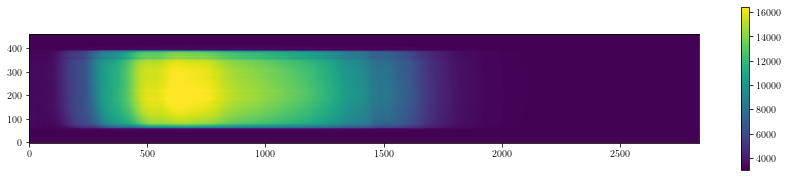

In [12]:
plt.figure(figsize=(15,3))
plt.imshow(data['blue0023'].T, origin='lower', clim=np.percentile(data['blue0023'].T, (1,99)))
plt.colorbar()

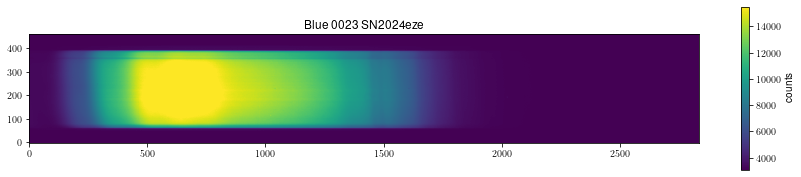

In [13]:
util.plot_frame(data['blue0023'].T, label='counts', title='Blue 0023 SN2024eze', prange=(5,95))

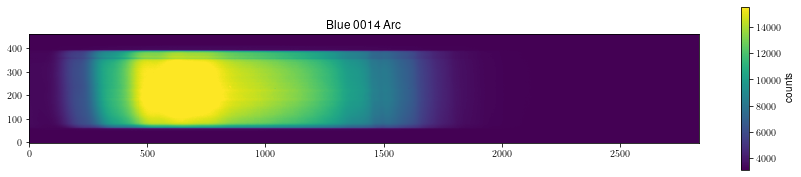

In [14]:
util.plot_frame(data['blue0014'].T, label='counts', title='Blue 0014 Arc', prange=(5,95))

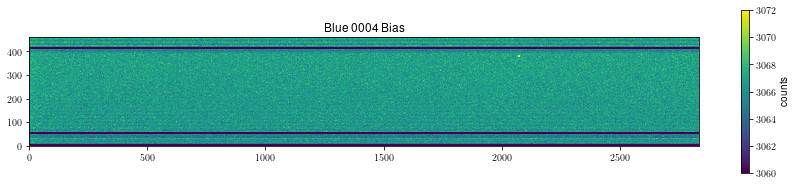

In [15]:
util.plot_frame(data['blue0004'].T, label='counts', title='Blue 0004 Bias', prange=(5,95))

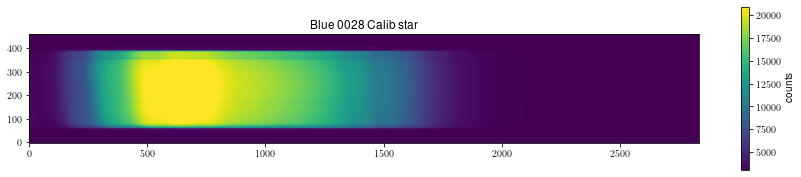

In [16]:
util.plot_frame(data['blue0028'].T, label='counts', title='Blue 0028 Calib star', prange=(5,95))

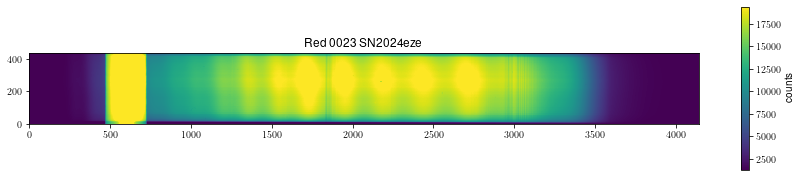

In [17]:
util.plot_frame(data['red0023'], label='counts', title='Red 0023 SN2024eze', prange=(10, 90))

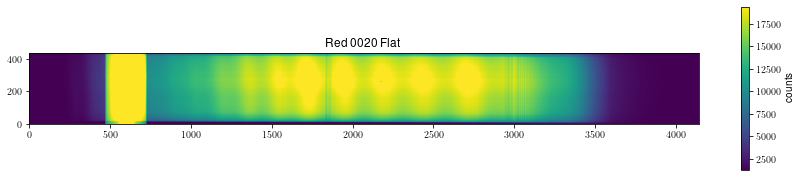

In [18]:
util.plot_frame(data['red0020'], label='counts', title='Red 0020 Flat', prange=(10, 90))

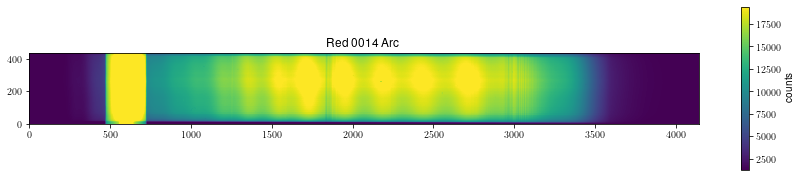

In [19]:
util.plot_frame(data['red0014'], label='counts', title='Red 0014 Arc', prange=(10, 90))

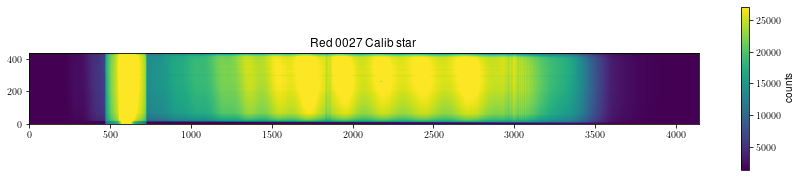

In [20]:
util.plot_frame(data['red0027'], label='counts', title='Red 0027 Calib star', prange=(10, 90))

## Prepare master frames
- for flat, bias, arc (denoted as cal in IMGTYPE), calib star

In [21]:
red_shape = data['red0001'].shape
blue_shape = data['blue0001'].shape

red_shape,blue_shape

((440, 4141), (2835, 460))

In [42]:
bias = hdr_df[hdr_df['IMGTYPE'] == 'bias']
flats = hdr_df[hdr_df['IMGTYPE'] == 'flat']
arcs = hdr_df[hdr_df['IMGTYPE'] == 'cal']
calib_star = hdr_df[(hdr_df['IMGTYPE'] == 'object') & (hdr_df['OBJECT'] == 'Feige34')]

In [43]:
#remove saturated frames for blue calib star
calib_star

OBJECT IMGTYPE  GAIN  EXPTIME          UT           RA  \
filename                                                            
blue0036  Feige34  object  0.72     60.0  03:16:04.3  10:39:33.70   
red0035   Feige34  object  2.80     60.0  03:13:40.5  10:39:33.75   
red0036   Feige34  object  2.80     60.0  03:16:07.9  10:39:33.70   
blue0035  Feige34  object  0.72     60.0  03:13:36.6  10:39:33.75   

                  DEC AIRMASS   GRATING  
filename                                 
blue0036  +43:05:55.4   1.089  600/4000  
red0035   +43:05:55.6   1.093  316/7500  
red0036   +43:05:55.7   1.089  316/7500  
blue0035  +43:05:55.6   1.093  600/4000

### Master bias (red)

In [44]:
def create_master(frame, color, bias=None):
    frame_filtered = frame[np.char.startswith(list(frame.index), color)]
    shape = red_shape if color=='red' else blue_shape
    layers = np.zeros((shape[0], shape[1], frame_filtered.shape[0]))
    for i, curr_file in enumerate(frame_filtered.index):
        curr_data = data[curr_file]
        if bias is not None:
            texp = frame_filtered.loc[curr_file, 'EXPTIME']
            curr_data = (curr_data - bias) / texp
        layers[:, :, i] = curr_data

    master = np.median(layers, axis=2)
    return master


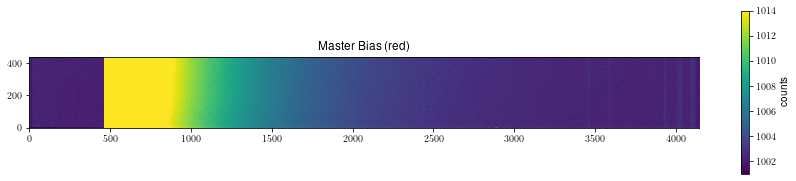

In [45]:
master_bias_red = create_master(bias, 'red')
util.plot_frame(master_bias_red, label='counts', title='Master Bias (red)', prange=(10, 90))

### Master bias (blue)

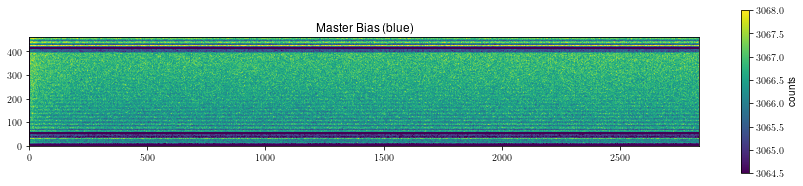

In [46]:
master_bias_blue = create_master(bias, 'blue')
util.plot_frame(master_bias_blue.T, label='counts', title='Master Bias (blue)', prange=(10, 90))

### Master flat (red)

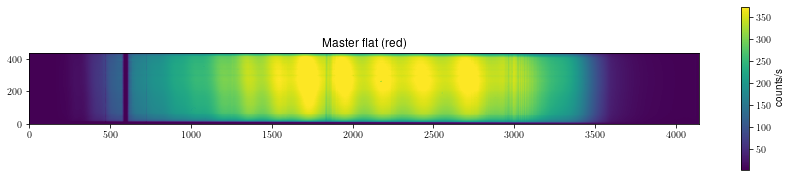

In [47]:
master_flat_red = create_master(flats, 'red', master_bias_red)
util.plot_frame(master_flat_red, label='counts/s', title='Master flat (red)', prange=(5, 95))

### Master flat (blue)

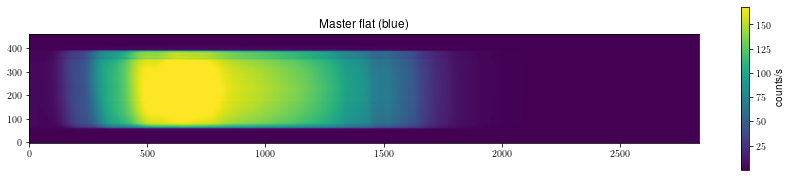

In [48]:
master_flat_blue= create_master(flats, 'blue', master_bias_blue)
util.plot_frame(master_flat_blue.T, label='counts/s', title='Master flat (blue)', prange=(5, 95))

### Master arc (red)

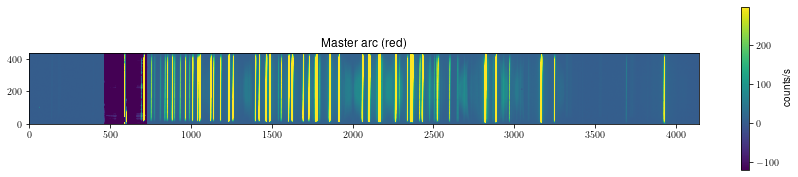

In [49]:
master_arc_red = create_master(arcs, 'red', master_bias_red)
util.plot_frame(master_arc_red, label='counts/s', title='Master arc (red)', prange=(5, 95))

### Master arc (blue)

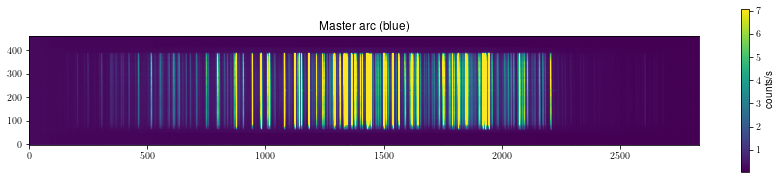

In [50]:
master_arc_blue = create_master(arcs, 'blue', master_bias_blue)
util.plot_frame(master_arc_blue.T, label='counts/s', title='Master arc (blue)', prange=(5, 95))

## Rectify frames

### Rectify blue
#### Find trace using calib star

In [51]:
master_calib_star_blue = create_master(calib_star, 'blue', master_bias_blue).T

(250.0, 350.0)

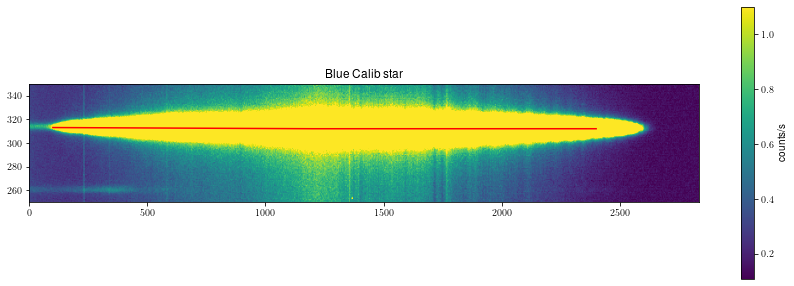

In [52]:
x_edges_B = [100, 1200, 2400] #0 is dead
y_edges_B = [np.argmax(master_calib_star_blue[:,i]) for i in x_edges_B]

prange_B = (5,95)
util.plot_frame(master_calib_star_blue, figsize=(15, 5), aspect=5, label='counts/s', title='Blue Calib star', prange=prange_B)
plt.plot(x_edges_B, y_edges_B, label='trace', color='r')
plt.ylim(250, 350)

In [53]:
trace_x_B = np.arange(0, master_calib_star_blue.shape[1], 1) # x indices remain same
# fit a polynomial using x,y edges_B and evaluate entire trace
trace_y_B = np.round(np.polyval(np.polyfit(x_edges_B, y_edges_B, 1), trace_x_B)).astype(int) #y indices has to be integers
trace_x_B.shape, trace_y_B.shape

((2835,), (2835,))

(250.0, 350.0)

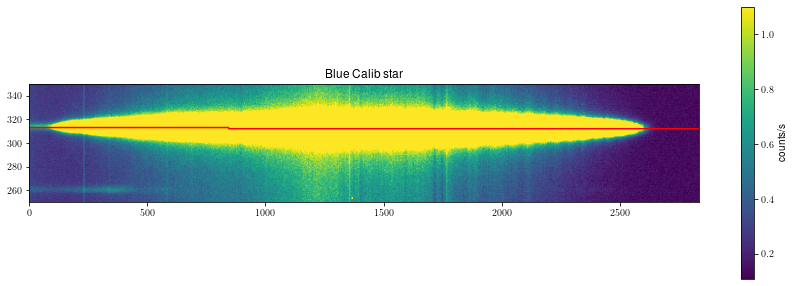

In [54]:
util.plot_frame(master_calib_star_blue, figsize=(15, 5), aspect=5, label='counts/s', title='Blue Calib star', prange=prange_B)
plt.plot(trace_x_B, trace_y_B, label='trace', color='r')
plt.ylim(250, 350)

#### Find y pixel bounds using flat

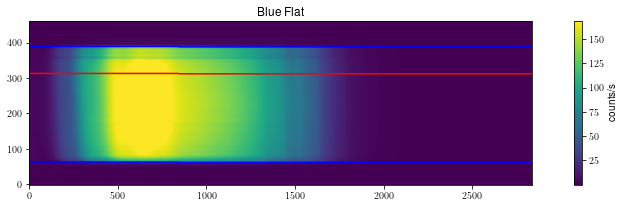

In [57]:
util.plot_frame(master_flat_blue.T, aspect=2, label='counts/s', title='Blue Flat', prange=prange_B)
plt.plot(trace_x_B, trace_y_B, color='r')

#y_bound_upper_B, y_bound_lower_B = (91, 200)
y_bound_upper_B, y_bound_lower_B = (76, 250)
plt.plot(trace_x_B, trace_y_B+y_bound_upper_B, color='b')
plt.plot(trace_x_B, trace_y_B-y_bound_lower_B, color='b')

In [58]:
master_flat_blue.T.shape

(460, 2835)

In [59]:
# 1. Transpose array [where needed]
# 2. Pick values column wise within the y bounds
rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B  = [
    util.rectify_frame(frame, trace_y_B, y_bound_upper_B, y_bound_lower_B) for frame in
    [master_flat_blue.T, master_calib_star_blue, master_bias_blue.T, master_arc_blue.T]]
rectified_flat_B.shape

(327, 2835)

#### Find X-trim bounds
Only bright area of flat has meaningful data (division by normalised flat suffers if x isn't trimmed)

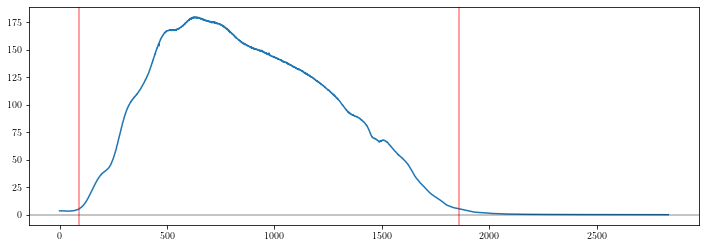

In [60]:
flat1D_B = np.median(rectified_flat_B, axis=0)
x_trim_mask_B = np.where((flat1D_B >= np.max(flat1D_B) * 0.03))[0] # selecting 0.03 based on 1D flat

plt.figure(figsize=(12,4))
plt.plot(flat1D_B)
plt.axvline(x_trim_mask_B[0], color='r', alpha=0.5)
plt.axvline(x_trim_mask_B[-1], color='r', alpha=0.5)
plt.axhline(0, color='black', alpha=0.3)

In [61]:
# 3. pick values within x-bounds
# 4. flip along X-axis (because blue has inverted wavelength axis)
rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B  = [
    frame[:, x_trim_mask_B][:,::-1] for frame in
    [rectified_flat_B, rectified_calib_B, rectified_bias_B, rectified_arc_B]]
rectified_flat_B.shape

(327, 1771)

#### Rectified blue frames plots

In [62]:
trace_y_idx_B = y_bound_lower_B

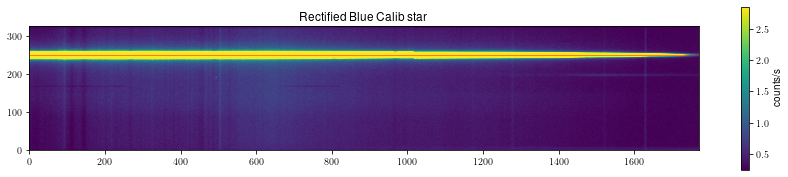

In [63]:
util.plot_frame(rectified_calib_B, label='counts/s', title='Rectified Blue Calib star', prange=prange_B)
plt.axhline(trace_y_idx_B, color='r', alpha=0.9, linewidth=0.5)

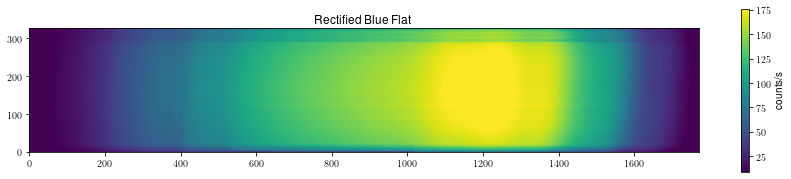

In [64]:
util.plot_frame(rectified_flat_B, label='counts/s', title='Rectified Blue Flat', prange=prange_B)

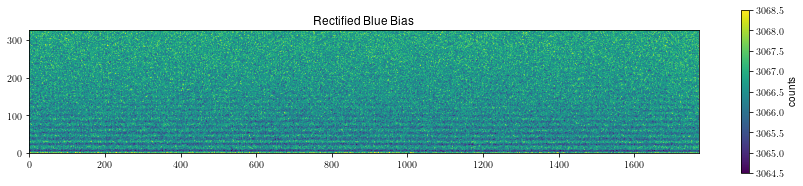

In [65]:
util.plot_frame(rectified_bias_B, label='counts', title='Rectified Blue Bias', prange=prange_B)


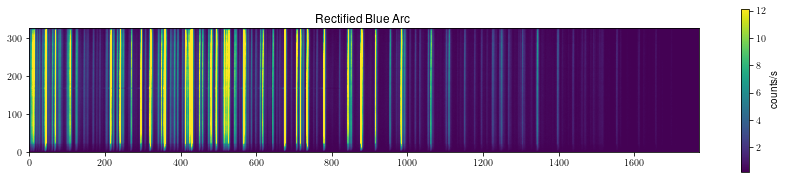

In [66]:
util.plot_frame(rectified_arc_B, label='counts/s', title='Rectified Blue Arc', prange=prange_B)

### Rectify Red
#### Find trace

In [67]:
master_calib_star_red = create_master(calib_star, 'red', master_bias_red)

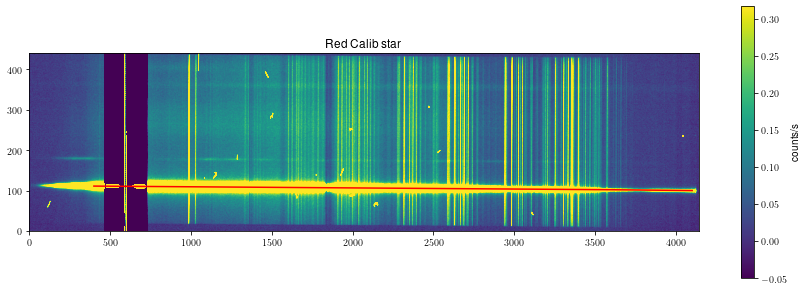

In [68]:
x_edges_R = [400, 3600, 4100]
y_edges_R = [np.argmax(master_calib_star_red[:,i]) for i in x_edges_R]

prange_R = (7,93)
util.plot_frame(master_calib_star_red, figsize=(15, 5), aspect=2.5, label='counts/s', title='Red Calib star', prange=prange_R)
plt.plot(x_edges_R, y_edges_R, label='trace', color='r')


In [69]:
trace_x_R = np.arange(0, master_calib_star_red.shape[1], 1) # x indices remain same
trace_y_R = np.round(np.polyval(np.polyfit(x_edges_R, y_edges_R, 1), trace_x_R)).astype(int) #y indices has to be integers
trace_x_R.shape, trace_y_R.shape

((4141,), (4141,))

#### Find y pixel bounds

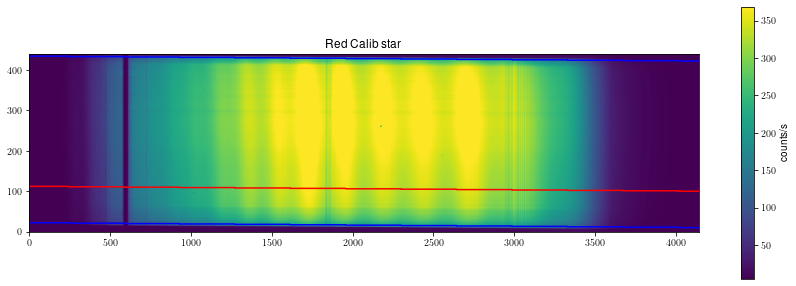

In [74]:
util.plot_frame(master_flat_red, figsize=(15, 5), aspect=2.5, label='counts/s', title='Red Calib star', prange=prange_R)
plt.plot(trace_x_R, trace_y_R, color='r')

#y_bound_upper_R, y_bound_lower_R = (282, 120)
y_bound_upper_R, y_bound_lower_R = (322, 90)
plt.plot(trace_x_R, trace_y_R+y_bound_upper_R, color='b')
plt.plot(trace_x_R, trace_y_R-y_bound_lower_R, color='b')

In [75]:
master_flat_red.shape

(440, 4141)

In [76]:
# 1. Pick values column wise within the y bounds
rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R  = [
    util.rectify_frame(frame, trace_y_R, y_bound_upper_R, y_bound_lower_R) for frame in
    [master_flat_red, master_calib_star_red, master_bias_red, master_arc_red]]
rectified_flat_R.shape

(413, 4141)

#### Find X-trim bounds
Need to remove dead area of detector and include only bright area of flat has meaningful data (division by normalised flat suffers if x isn't trimmed)

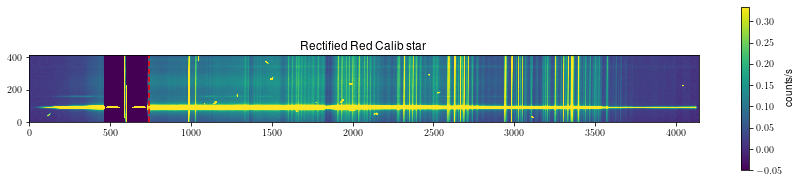

In [77]:
util.plot_frame(rectified_calib_R, label='counts/s', title='Rectified Red Calib star', prange=prange_R)
plt.axvline(740, color='r', linestyle='--') # need to discard the bad section too

In [78]:
np.median(rectified_calib_R, axis=0)[720: 750]

array([-1.10916667e+01, -1.16666667e+01, -2.00416667e+01, -2.52666667e+01,
       -6.23000000e+01, -1.26225000e+02, -7.79583333e+01, -3.24166667e+00,
       -1.50000000e-01,  4.16666667e-02,  1.08333333e-01,  1.08333333e-01,
        9.16666667e-02,  1.16666667e-01,  8.33333333e-02,  1.25000000e-01,
        9.16666667e-02,  1.08333333e-01,  1.08333333e-01,  1.00000000e-01,
        1.16666667e-01,  8.33333333e-02,  1.16666667e-01,  9.16666667e-02,
        1.08333333e-01,  1.16666667e-01,  1.00000000e-01,  1.33333333e-01,
        9.16666667e-02,  1.25000000e-01])

In [79]:
np.median(rectified_calib_R, axis=0)[731:733]

array([0.10833333, 0.09166667])

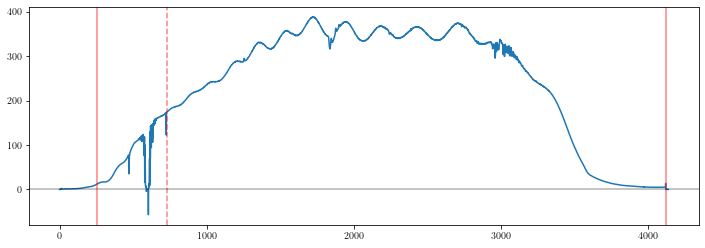

In [80]:
flat1D_R = np.median(rectified_flat_R, axis=0)

x_trim_mask_R = np.where((flat1D_R >= np.max(flat1D_R) * 0.03))[0]

plt.figure(figsize=(12,4))
plt.plot(flat1D_R)
plt.axvline(x_trim_mask_R[0], color='r', alpha=0.5)
plt.axvline(x_trim_mask_R[-1], color='r', alpha=0.5)
plt.axvline(732, color='r', linestyle='--', alpha=0.5) # the bad section
plt.axhline(0, color='black', alpha=0.3)

In [81]:
x_trim_mask_R = x_trim_mask_R[x_trim_mask_R>=732]
x_trim_mask_R

array([ 732,  733,  734, ..., 3782, 3783, 4122])

In [86]:
# 2. pick values within x-bounds
rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R  = [
    frame[:, x_trim_mask_R] for frame in
    [rectified_flat_R, rectified_calib_R, rectified_bias_R, rectified_arc_R]]
rectified_flat_R.shape

IndexError: index 3053 is out of bounds for axis 1 with size 3053

#### Rectifed Red frames plots

In [87]:
trace_y_idx_R = y_bound_lower_R

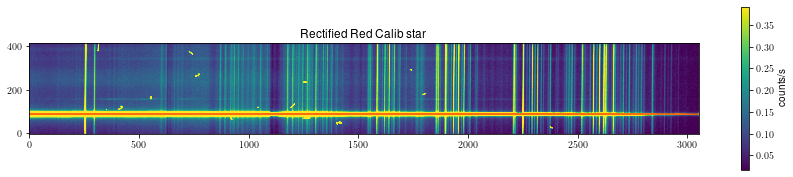

In [88]:
util.plot_frame(rectified_calib_R, label='counts/s', title='Rectified Red Calib star', prange=prange_R)
plt.axhline(trace_y_idx_R, color='r', alpha=0.7)

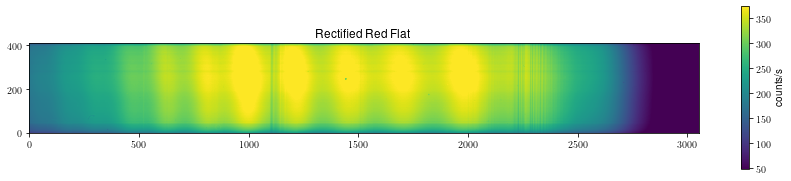

In [89]:
util.plot_frame(rectified_flat_R, label='counts/s', title='Rectified Red Flat', prange=prange_R)

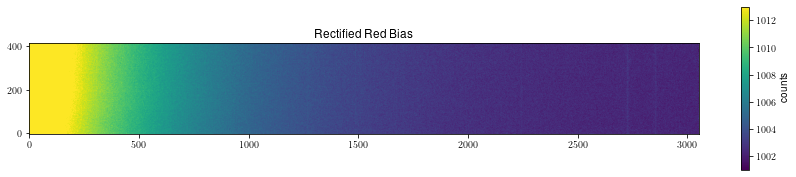

In [90]:
util.plot_frame(rectified_bias_R, label='counts', title='Rectified Red Bias', prange=prange_R)

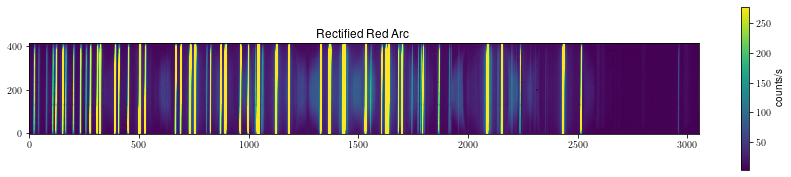

In [91]:
util.plot_frame(rectified_arc_R, label='counts/s', title='Rectified Red Arc', prange=prange_R)

## Reduce frames 
- subtract bias, divide by exptime - already done by create_master()
- divide by normalised flat

In [92]:
rectified_flat_B.shape, rectified_flat_R.shape

((327, 1771), (413, 3053))

### Red

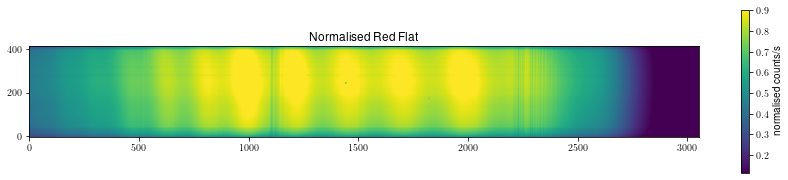

In [93]:
normalised_flat_R = rectified_flat_R / np.max(rectified_flat_R)
util.plot_frame(normalised_flat_R, label='normalised counts/s', title='Normalised Red Flat', prange=prange_R)

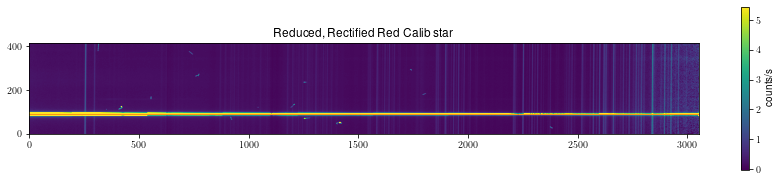

In [94]:
reduced_rect_calib_R = rectified_calib_R / normalised_flat_R

util.plot_frame(reduced_rect_calib_R, label='counts/s', title='Reduced, Rectified Red Calib star', prange=(2,98))
plt.axhline(trace_y_idx_R, color='r', alpha=0.7, linewidth=0.5)

### Blue

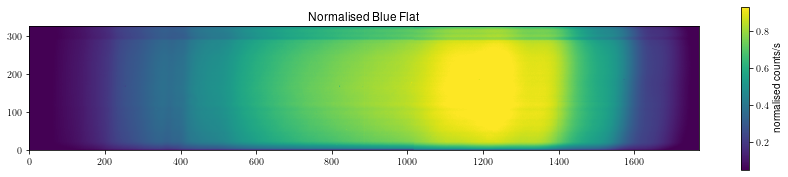

In [95]:
normalised_flat_B = rectified_flat_B / np.max(rectified_flat_B)
util.plot_frame(normalised_flat_B, label='normalised counts/s', title='Normalised Blue Flat', prange=prange_B)

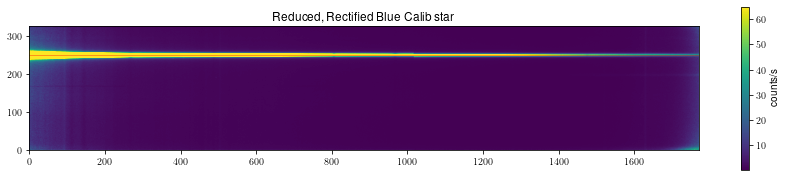

In [96]:
reduced_rect_calib_B = rectified_calib_B / normalised_flat_B

util.plot_frame(reduced_rect_calib_B, label='counts/s', title='Reduced, Rectified Blue Calib star', prange=(2, 98))
plt.axhline(trace_y_idx_B, color='r', alpha=0.7, linewidth=0.5)

## Wavelength calibration
- use arc to derive a px to wvl solution

### Blue

In [97]:
arc_aperture_B = (rectified_calib_B.shape[0]-1 - trace_y_idx_B)
arc_aperture_B

76

In [98]:
# take median and flip along x-axis
arc_1D_spectrum_B = np.median(rectified_arc_B[trace_y_idx_B - arc_aperture_B : trace_y_idx_B + arc_aperture_B + 1], axis=0)
rectified_arc_B.shape, arc_1D_spectrum_B.shape

((327, 1771), (1771,))

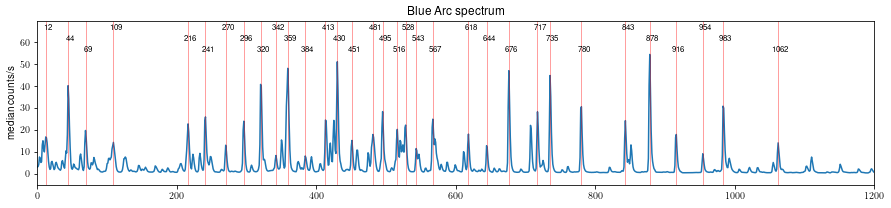

In [99]:
plt.figure(figsize=(15, 3))
plt.plot(arc_1D_spectrum_B)
plt.ylabel('median counts/s')
plt.title('Blue Arc spectrum')
plt.xlim(0, 1200)
plt.ylim(-5, np.max(arc_1D_spectrum_B)+15) # to allow space for annotations

peaks_x_B, _ = find_peaks(arc_1D_spectrum_B, height=8, distance=12)

for i, px in enumerate(peaks_x_B):
    plt.axvline(px, color='r', alpha=0.75, linewidth=0.5)
    plt.text(px+4, np.max(arc_1D_spectrum_B)+12-(5*(i%3)), f'{px}', fontsize=8, ha='center', va='center')

In [112]:
# Identified peaks from figure 10c, 10b (page 29-30 in https://sites.astro.caltech.edu/palomar/observer/200inchResources/dbsp/dbspArcAtlas.pdf)
# peaks_wvl_B = {
#     1816: (4764.865, 'Ar'), # tallest in 10c
#     # L to R to tallest ----
#     1854: (4806.021, 'Ar'),
#     1893: (4847.810, 'Ar'),
#     1922: (4879.864, 'Ar'),
#     # R to L of tallest -----
#     1782: (4726.868, 'Ar'),
#     1718: (4657.901, 'Ar'),
#     1674: (4609.567, 'Ar'),
#     1615: (4545.052, 'Ar'),
#     1557: (4481.811, 'Ar'),
#     1506: (4426.001, 'Ar'),
#     1434: (4348.064, 'Ar'),
#     1369: (4277.528, 'Ar'),
#     1352: (4259.362, 'Ar'),
#     1298: (4198.317, 'Ar'),
#     1259: (4158.591, 'Ar'),
#     # more in 10b -------
#     1234: (4131.724, 'Ar'),
#     1209: (4103.912, 'Ar'),
#     1155: (4045.813, 'Fe'),
#     1007: (3886.282, 'Fe'),
#     983: (3859.911, 'Fe'),
#     895: (3763.789, 'Fe'),
#     853: (3719.935, 'Fe'),
#     723: (3581.193, 'Fe')
# }

# using: {key - 910: value for key, value in peaks_wvl_B.items() if key - 910 >= 0}
peaks_wvl_B = {
 906: (4764.865, 'Ar'),
 944: (4806.021, 'Ar'),
 983: (4847.81, 'Ar'),
 1012: (4879.864, 'Ar'),
 872: (4726.868, 'Ar'),
 808: (4657.901, 'Ar'),
 764: (4609.567, 'Ar'),
 705: (4545.052, 'Ar'),
 647: (4481.811, 'Ar'),
 596: (4426.001, 'Ar'),
 524: (4348.064, 'Ar'),
 459: (4277.528, 'Ar'),
 442: (4259.362, 'Ar'),
 388: (4198.317, 'Ar'),
 349: (4158.591, 'Ar'),
 324: (4131.724, 'Ar'),
 299: (4103.912, 'Ar'),
 245: (4045.813, 'Fe'),
 97: (3886.282, 'Fe'),
 73: (3859.911, 'Fe')
 }

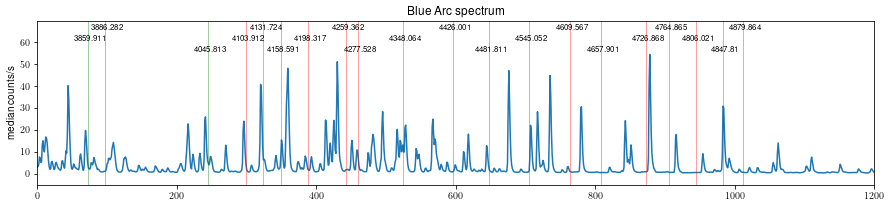

In [113]:
plt.figure(figsize=(15, 3))
plt.plot(arc_1D_spectrum_B)
plt.ylabel('median counts/s')
plt.title('Blue Arc spectrum')
plt.xlim(0, 1200)
plt.ylim(-5, np.max(arc_1D_spectrum_B)+15) # to allow space for annotations


for i, (px, wvl) in enumerate(peaks_wvl_B.items()):
    line_clr = 'green' if wvl[1]=='Fe' else 'red'
    plt.axvline(px, color=line_clr, alpha=0.75, linewidth=0.5, label=wvl[1])
    plt.text(px+4, np.max(arc_1D_spectrum_B)+12-(5*(i%3)), f'{wvl[0]}', fontsize=8, ha='center', va='center')

# plt.legend();

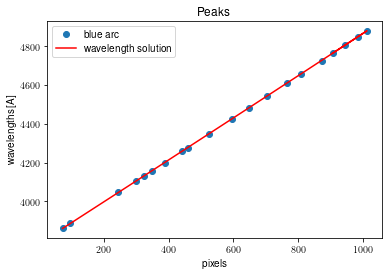

In [114]:
peaks_pixels_B = np.array(list(peaks_wvl_B.keys()))
peaks_wavelengths_B = np.array([wvl for wvl, _ in peaks_wvl_B.values()])

def wvl_solution_B(pixels, deg=2):
    coefficients = np.polyfit(peaks_pixels_B, peaks_wavelengths_B, deg)
    return np.polyval(coefficients, pixels)

plt.scatter(peaks_pixels_B, peaks_wavelengths_B, label='blue arc')
plt.plot(peaks_pixels_B, wvl_solution_B(peaks_pixels_B), color='r', label='wavelength solution')
plt.xlabel('pixels')
plt.ylabel('wavelengths [A]')
plt.title('Peaks')
plt.legend();

### Red

In [115]:
arc_aperture_R = trace_y_idx_R
arc_aperture_R

90

In [116]:
arc_1D_spectrum_R = np.median(rectified_arc_R[trace_y_idx_R - arc_aperture_R : trace_y_idx_R + arc_aperture_R + 1], axis=0)
arc_1D_spectrum_R.shape

(3053,)

array([ 278,  310,  322,  391,  451,  503,  528,  667,  690,  734,  755,
        872,  896,  963,  998, 1040, 1126, 1183, 1328, 1372, 1437, 1533,
       1606, 1637, 1699, 1794, 2088, 2153, 2433])

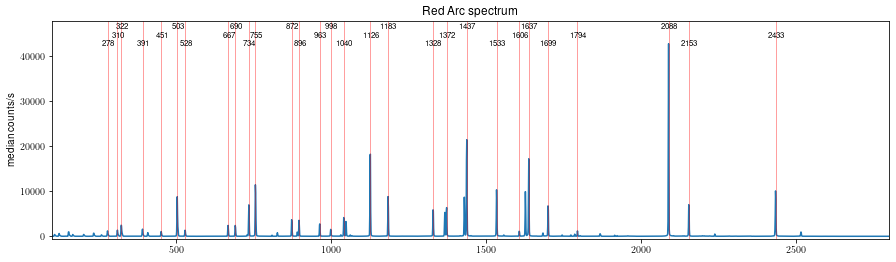

In [117]:
plt.figure(figsize=(15, 4))
plt.plot(arc_1D_spectrum_R)
plt.ylabel('median counts/s')
plt.title('Red Arc spectrum')
plt.xlim(100, 2800)
plt.ylim(-500, np.max(arc_1D_spectrum_R)+5000) # to allow space for annotations

peaks_x_R, _ = find_peaks(arc_1D_spectrum_R, height=1000, distance=12)

for i, px in enumerate(peaks_x_R):
    plt.axvline(px, color='r', alpha=0.75, linewidth=0.5)
    plt.text(px+4, np.max(arc_1D_spectrum_R)+(1900*(i%3)), f'{px}', fontsize=8, ha='center', va='center')
peaks_x_R

In [118]:
# Identified peaks from figure 16b, 18a (https://sites.astro.caltech.edu/palomar/observer/200inchResources/dbsp/dbspArcAtlas.pdf)
# peaks_wvl_R = {
#     3385: (9657.786, 'Ar'),
#     3105: (9224.499, 'Ar'),
#     3040: (9122.967, 'Ar'),
#     2651: (8521.442, 'Ar'),
#     2589: (8424.648, 'Ar'),
#     2485: (8264.522, 'Ar'),
#     2388: (8115.311, 'Ar'),
#     2323: (8014.786, 'Ar'),
#     2280: (7948.176, 'Ar'),
#     2135: (7723.761, 'Ar'),
#     2077: (7635.106, 'Ar'),
#     1992: (7503.869, 'Ar'),
#     1231: (6334.428, 'Ne'),  # much less confident in Ne matches
#     1263: (6382.992, 'Ne'),
#     1276: (6402.246, 'Ne'),
#     1344: (6506.628, 'Ne'),
#     1456: (6678.276, 'Ne'),
#     1481: (6717.043, 'Ne'),
# }

# {key - 733: value for key, value in peaks_wvl_R.items() if key - 733 >= 0}

peaks_wvl_R = {
 2652: (9657.786, 'Ar'),
 2372: (9224.499, 'Ar'),
 2307: (9122.967, 'Ar'),
 1918: (8521.442, 'Ar'),
 1856: (8424.648, 'Ar'),
 1752: (8264.522, 'Ar'),
 1655: (8115.311, 'Ar'),
 1590: (8014.786, 'Ar'),
 1547: (7948.176, 'Ar'),
 1402: (7723.761, 'Ar'),
 1344: (7635.106, 'Ar'),
 1259: (7503.869, 'Ar'),
 498: (6334.428, 'Ne'),
 530: (6382.992, 'Ne'),
 543: (6402.246, 'Ne'),
 611: (6506.628, 'Ne'),
 723: (6678.276, 'Ne'),
 748: (6717.043, 'Ne')
}

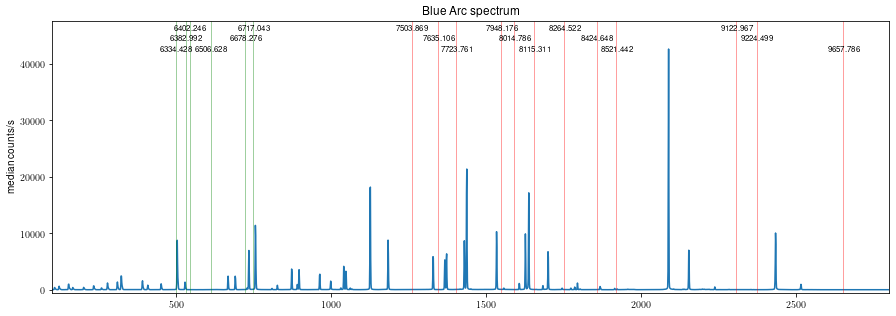

In [119]:
plt.figure(figsize=(15, 5))
plt.plot(arc_1D_spectrum_R)
plt.ylabel('median counts/s')
plt.title('Blue Arc spectrum')
plt.xlim(100, 2800)
plt.ylim(-500, np.max(arc_1D_spectrum_R)+5000) # to allow space for annotations


for i, (px, wvl) in enumerate(peaks_wvl_R.items()):
    line_clr = 'green' if wvl[1]=='Ne' else 'red'
    plt.axvline(px, color=line_clr, alpha=0.75, linewidth=0.5, label=wvl[1])
    plt.text(px+4, np.max(arc_1D_spectrum_R)+(1900*(i%3)), f'{wvl[0]}', fontsize=8, ha='center', va='center')

# plt.legend();

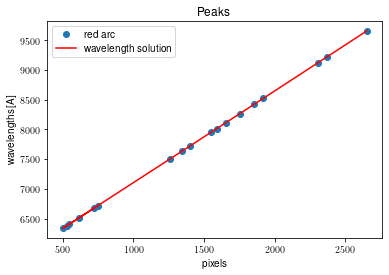

In [120]:
peaks_pixels_R = np.array(list(peaks_wvl_R.keys()))
peaks_wavelengths_R = np.array([wvl for wvl, _ in peaks_wvl_R.values()])

def wvl_solution_R(pixels, deg=2):
    coefficients = np.polyfit(peaks_pixels_R, peaks_wavelengths_R, deg)
    return np.polyval(coefficients, pixels)

plt.scatter(peaks_pixels_R, peaks_wavelengths_R, label='red arc')
plt.plot(peaks_pixels_R, wvl_solution_R(peaks_pixels_R), color='r', label='wavelength solution')
plt.xlabel('pixels')
plt.ylabel('wavelengths [A]')
plt.title('Peaks')
plt.legend();

### Wavelength ranges

In [121]:
rectified_arc_R.shape

(413, 3053)

In [122]:
wvl_range_R = wvl_solution_R(np.arange(0, rectified_arc_R.shape[1]))
wvl_range_R

array([ 5569.95825804,  5571.48940354,  5573.0205569 , ...,
       10276.45502542, 10278.01011515, 10279.56521274])

In [123]:
rectified_arc_B.shape

(327, 1771)

In [124]:
wvl_range_B = wvl_solution_B(np.arange(0, rectified_arc_B.shape[1]))
wvl_range_B

array([3781.36072026, 3782.43738999, 3783.51407786, ..., 5713.23935202,
       5714.34808348, 5715.45683308])

In [125]:
# where R starts
wvl_range_R[0] 

5569.958258040785

In [126]:
# find index of a number in B that is just smaller than R's start
just_before_R_idx = np.searchsorted(wvl_range_B, wvl_range_R[0])-1 

# right-truncated B wavlengths
end_idx_B = just_before_R_idx + 1 # because np slicing excludes end index
wvl_range_B_trunc = wvl_range_B[: end_idx_B]
wvl_range_B_trunc

array([3781.36072026, 3782.43738999, 3783.51407786, ..., 5567.04598284,
       5568.15232055, 5569.2586764 ])

## Airmass correction 
- use airmass extinction to find zero airmass flux for calib star 

## Flux calibration
- Source and BG extraction on calib star
- Derive counts to photons conversion factor for both red and blue

### source and background extraction

#### Red

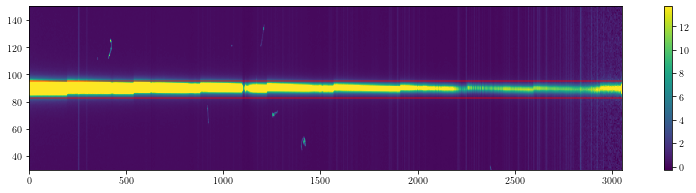

In [127]:
util.plot_frame(reduced_rect_calib_R, prange=(1,99), aspect=7)

aperture_idx_R = (trace_y_idx_R-1 - 6, trace_y_idx_R-1 + 6)
plt.axhline(y=aperture_idx_R[0], color='r', alpha=0.5)
plt.axhline(y=aperture_idx_R[1], color='r', alpha=0.5)
# plt.xlim(1000, 1200)
plt.ylim(trace_y_idx_R - 10 * 6,trace_y_idx_R + 10 * 6 ); 

Text(0.5, 1.0, 'rectified calib star spectrum (RED)')

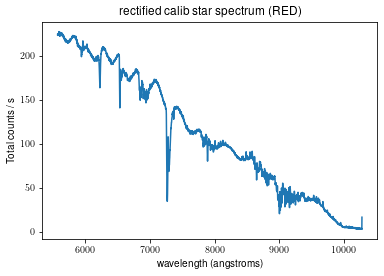

In [128]:
calib_spectrum_R = np.sum(
    rectified_calib_R[aperture_idx_R[0]: aperture_idx_R[1]+1, :],
    axis=0)
plt.plot(wvl_range_R, calib_spectrum_R)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("rectified calib star spectrum (RED)")

Text(0.5, 1.0, 'reduced rectified calib star spectrum (RED)')

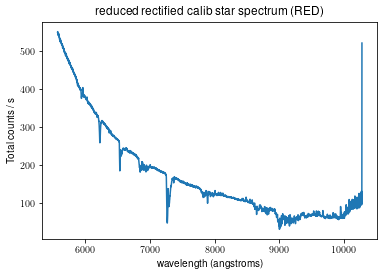

In [129]:
calib_spectrum_R = np.sum(
    reduced_rect_calib_R[aperture_idx_R[0]: aperture_idx_R[1]+1, :],
    axis=0)
plt.plot(wvl_range_R, calib_spectrum_R)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified calib star spectrum (RED)")

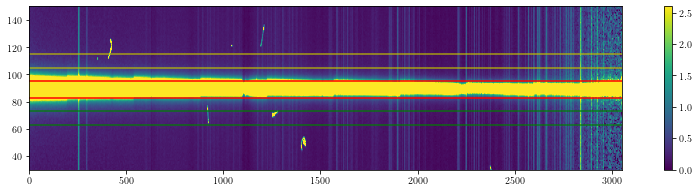

In [130]:
bg_upper_idx_R = (aperture_idx_R[1]+10, aperture_idx_R[1]+20)
bg_lower_idx_R = (aperture_idx_R[0]-20, aperture_idx_R[0]-10)

util.plot_frame(reduced_rect_calib_R, prange=(3,97), aspect=7)
plt.ylim(trace_y_idx_R - 10 * 6,trace_y_idx_R + 10 * 6 )
plt.axhline(y=aperture_idx_R[0], color='r')
plt.axhline(y=aperture_idx_R[1], color='r')

plt.axhline(bg_lower_idx_R[0], color='g', alpha=0.8)
plt.axhline(bg_lower_idx_R[1], color='g', alpha=0.8)
plt.axhline(bg_upper_idx_R[0], color='y', alpha=0.8)
plt.axhline(bg_upper_idx_R[1], color='y', alpha=0.8)

Text(0.5, 1.0, 'Red calib star background signal')

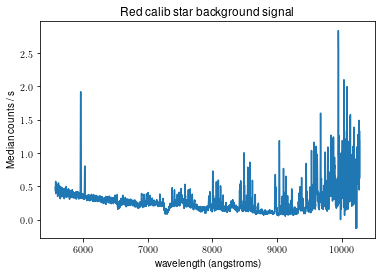

In [131]:
upper_bg_R = reduced_rect_calib_R[bg_upper_idx_R[0]: bg_upper_idx_R[1]+1]
lower_bg_R = reduced_rect_calib_R[bg_lower_idx_R[0]: bg_lower_idx_R[1]+1]

bg_R = np.vstack([upper_bg_R, lower_bg_R])

bg_signal_R = np.median(bg_R, axis=0)
plt.plot(wvl_range_R, bg_signal_R)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Median counts / s")
plt.title("Red calib star background signal")

Text(0.5, 1.0, 'reduced rectified background-subtracted calib star spectrum (RED)')

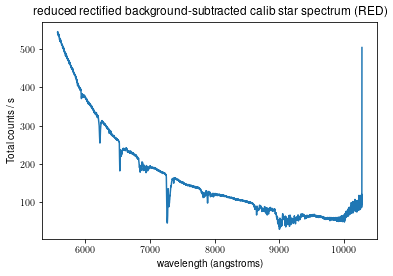

In [132]:
aperture_nrows_R = aperture_idx_R[1]-aperture_idx_R[0]+1 #both are inclusive
summed_bg_R = bg_signal_R * aperture_nrows_R
calib_bg_subtracted_R = calib_spectrum_R - summed_bg_R
plt.plot(wvl_range_R, calib_bg_subtracted_R)

plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified background-subtracted calib star spectrum (RED)")

#### Blue

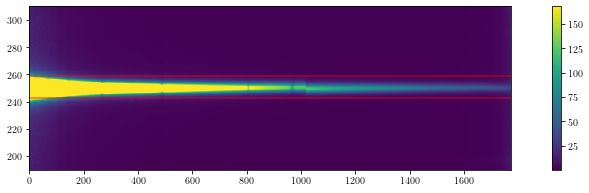

In [133]:
util.plot_frame(reduced_rect_calib_B, prange=(1,99), aspect=5)

aperture_idx_B = (trace_y_idx_B+1 - 8, trace_y_idx_B+1 + 8)
plt.axhline(y=aperture_idx_B[0], color='r', alpha=0.5)
plt.axhline(y=aperture_idx_B[1], color='r', alpha=0.5)
# plt.xlim(1000, 1200)
plt.ylim(trace_y_idx_B - 60, trace_y_idx_B + 60); 

Text(0.5, 1.0, 'rectified calib star spectrum (BLUE)')

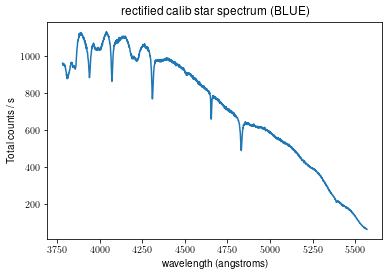

In [134]:
calib_spectrum_B = np.sum(
    rectified_calib_B[aperture_idx_B[0]: aperture_idx_B[1]+1, :end_idx_B], 
    axis=0)
plt.plot(wvl_range_B_trunc, calib_spectrum_B)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("rectified calib star spectrum (BLUE)")

Text(0.5, 1.0, 'reduced rectified calib star spectrum (BLUE)')

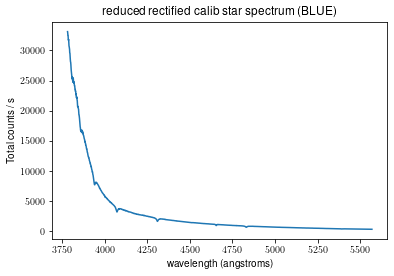

In [135]:
calib_spectrum_B = np.sum(
    reduced_rect_calib_B[aperture_idx_B[0]: aperture_idx_B[1]+1, :end_idx_B], 
    axis=0)
plt.plot(wvl_range_B_trunc, calib_spectrum_B)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified calib star spectrum (BLUE)")

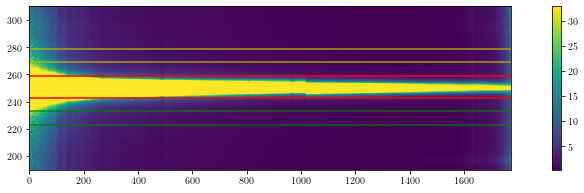

In [136]:
bg_upper_idx_B = (aperture_idx_B[1]+10, aperture_idx_B[1]+20)
bg_lower_idx_B = (aperture_idx_B[0]-20, aperture_idx_B[0]-10)

util.plot_frame(reduced_rect_calib_B, prange=(3,97), aspect=5)
plt.ylim(trace_y_idx_B - 60, trace_y_idx_B + 60)
plt.axhline(y=aperture_idx_B[0], color='r')
plt.axhline(y=aperture_idx_B[1], color='r')

plt.axhline(bg_lower_idx_B[0], color='g', alpha=0.8)
plt.axhline(bg_lower_idx_B[1], color='g', alpha=0.8)
plt.axhline(bg_upper_idx_B[0], color='y', alpha=0.8)
plt.axhline(bg_upper_idx_B[1], color='y', alpha=0.8)

Text(0.5, 1.0, 'median background signal (BLUE)')

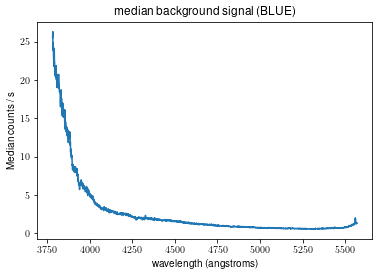

In [137]:
lower_bg_B = reduced_rect_calib_B[bg_lower_idx_B[0] : bg_lower_idx_B[1]+1]
upper_bg_B = reduced_rect_calib_B[bg_upper_idx_B[0] : bg_upper_idx_B[1]+1]

bg_B = np.vstack([upper_bg_B, lower_bg_B])

bg_signal_B = np.median(bg_B[:, :end_idx_B], axis=0)
plt.plot(wvl_range_B_trunc, bg_signal_B)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Median counts / s")
plt.title("median background signal (BLUE)")

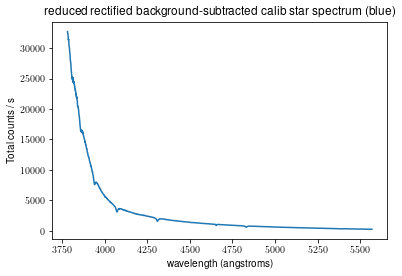

In [138]:
aperture_nrows_B = aperture_idx_B[1]-aperture_idx_B[0]+1 #both are inclusive
summed_bg_B = bg_signal_B * aperture_nrows_B
calib_bg_subtracted_B = calib_spectrum_B - summed_bg_B
plt.plot(wvl_range_B_trunc, calib_bg_subtracted_B)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("Total counts / s")
plt.title("reduced rectified background-subtracted calib star spectrum (blue)");

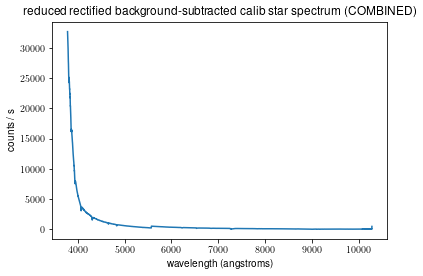

In [139]:
wvl_solution = np.hstack([wvl_range_B_trunc, wvl_range_R])
calib_final = np.hstack([calib_bg_subtracted_B, calib_bg_subtracted_R])
plt.plot(wvl_solution, calib_final)
plt.xlabel("wavelength (angstroms)")
plt.ylabel("counts / s")
plt.title("reduced rectified background-subtracted calib star spectrum (COMBINED)");

### Reference spectrum from pysynphot

In [416]:
# add env variable before importing pysynphot
pysyn_env_location = os.path.join(os.getcwd(), 'grp/redcat/trds/')
os.environ['PYSYN_CDBS'] = pysyn_env_location #note: CDBS not CBDS which is why it was throwing errors

import pysynphot as S

In [417]:
os.environ['PYSYN_CDBS']

'/Users/dennisraush/Desktop/caltech/senior/spring/Ay-Ge 107/ay107_observation/grp/redcat/trds/'

In [145]:
# from https://articles.adsabs.harvard.edu/full/2006MNRAS.368..247C/0000247.000.html: 
# Teff: 9900+-220, log g: 4.00+-0.10, assuming metallicity [M/H] = 0
pysyn_env_location = os.path.join(os.getcwd(), 'grp/redcat/trds/')
os.environ['PYSYN_CDBS'] = pysyn_env_location  #note: CDBS not CBDS which is why it was throwing errors

import pysynphot as S

# ref_spec = S.Icat('k93models', 9900, 0, 4.0)
ref_spec_filename = 'feige34_stis_006.fits'
ref_spec = S.FileSpectrum(ref_spec_filename)

In [146]:
# resample ref spectrum to our wavelength grid
ref_spec_resampled = ref_spec.resample(wvl_solution) #TODO: try scipy.signal.resample() over this
ref_spec.wave.shape, ref_spec_resampled.wave.shape

((3305,), (4692,))

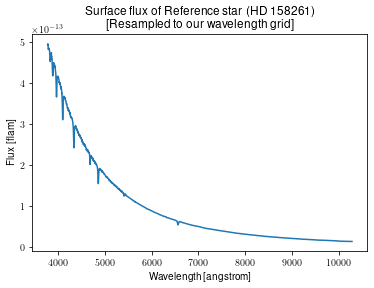

In [147]:
plt.plot(ref_spec_resampled.wave, ref_spec_resampled.flux)
# plt.xlim(wvl_solution[0],wvl_solution[-1])
plt.xlabel(f'Wavelength [{ref_spec_resampled.waveunits}]')
plt.ylabel(f'Flux [{ref_spec_resampled.fluxunits}]')
plt.title('Surface flux of Reference star (HD 158261)\n[Resampled to our wavelength grid]');

In [149]:
# surface flux to absolute flux can be obtained by renormalisation
# as mentioned at 2nd para in https://pysynphot.readthedocs.io/en/latest/appendixa.html#kurucz-atlas


# from https://simbad.cds.unistra.fr/simbad/sim-id?Ident=HD+158261&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id
# V = 5.94 vegamag (default mag system is vega unless specified as per https://simbad.cds.unistra.fr/guide/sim-id.htx)
ref_spec_resampled_abs = ref_spec_resampled.renorm(11.18, 'vegamag', S.ObsBandpass('johnson,v'))

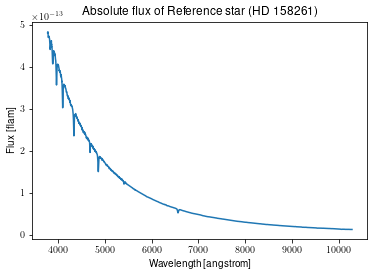

In [150]:
plt.plot(ref_spec_resampled_abs.wave, ref_spec_resampled_abs.flux)
# plt.xlim(wvl_solution[0],wvl_solution[-1])
plt.xlabel(f'Wavelength [{ref_spec_resampled_abs.waveunits}]')
plt.ylabel(f'Flux [{ref_spec_resampled_abs.fluxunits}]')
plt.title('Absolute flux of Reference star (HD 158261)');

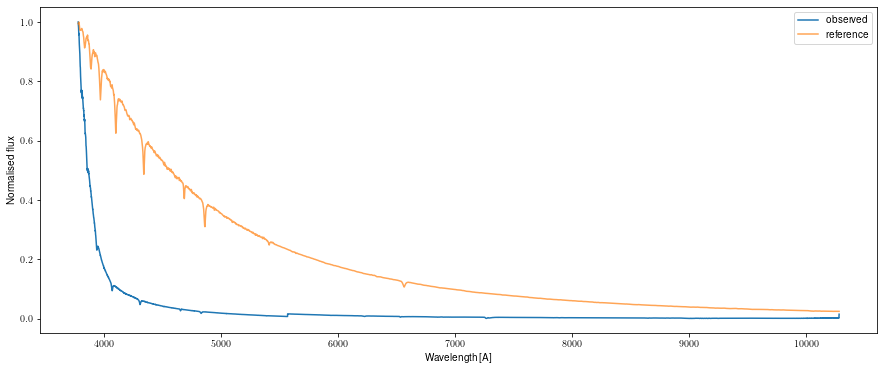

In [151]:
plt.figure(figsize=(15, 6))
plt.plot(wvl_solution, calib_final/np.max(calib_final), label='observed')
plt.plot(ref_spec_resampled_abs.wave, ref_spec_resampled_abs.flux/np.max(ref_spec_resampled_abs.flux), label='reference', alpha=0.7)
plt.legend()
plt.xlabel('Wavelength [A]')
plt.ylabel('Normalised flux');
# plt.xlim(3700, 5000)

In [152]:
ref_spec_resampled_abs.fluxunits # flam = erg s-1 cm-2 A-1

In [153]:
calibration_flux = (ref_spec_resampled_abs.flux * u.Unit('erg s-1 cm-2 AA-1')) / (calib_final * u.Unit('count/s'))
calibration_flux

<Quantity [1.46878971e-17, 1.47929680e-17, 1.49580056e-17, ...,
           1.00328616e-16, 1.27855019e-16, 2.40714915e-17] erg / (Angstrom cm2 ct)>

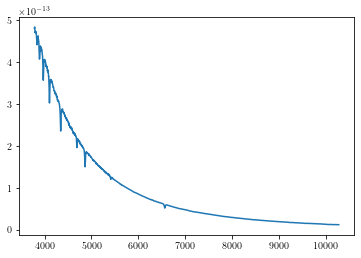

In [154]:
plt.plot(wvl_solution, calibration_flux * calib_final) #sanity check
# plt.xlim(3700, 5000)


## Process Science data
- All above steps on science data to extract spectrum from images

### Rectify, reduce, airmass-correct frames

In [158]:
science = hdr_df[(hdr_df['IMGTYPE']=='object') & (hdr_df['OBJECT'] == 'ZTF24aahsyhe')]
science

OBJECT IMGTYPE  GAIN  EXPTIME          UT           RA  \
filename                                                                 
red0072   ZTF24aahsyhe  object  2.80    720.0  11:13:24.4  16:59:05.98   
blue0072  ZTF24aahsyhe  object  0.72    720.0  11:13:14.8  16:59:05.98   

                  DEC AIRMASS   GRATING  
filename                                 
red0072   +42:51:56.5   1.014  316/7500  
blue0072  +42:51:56.5   1.014  600/4000

In [159]:
# TODO: if applying airmass correction, then replace create_master with following function 
# that does median stacking after applying rectification, reduction, correction to each individual frame
def master_science_frame(color):
    # TODO: split red and blue

    science_wvl, extinction_wvl, extinction = None #TODO: add np arrays when available
    science_frames = []
    for fname in science.index:
        frame = util.rectify_frame(data[fname], trace_y_R, y_bound_upper_R, y_bound_lower_R)
        frame = util.reduce_frame(frame, science.loc[fname, 'EXPTIME'], normalised_flat_R, master_bias_red)
        frame = util.correct_airmass(science_wvl, frame, extinction_wvl, extinction, science.loc[fname, 'AIRMASS'])
        science_frames.append(frame)

    return np.median(np.array(science_frames), axis=0)

In [160]:
science_master_red = create_master(science, 'red', master_bias_red)
science_master_blue = create_master(science, 'blue', master_bias_blue)
science_master_red.shape, science_master_blue.shape

((440, 4141), (2835, 460))

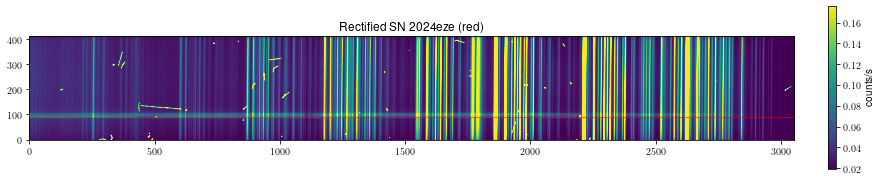

In [161]:
# apply step #1-2 from "Rectify red" section
science_red_rectified = util.rectify_frame(
    science_master_red, trace_y_R, y_bound_upper_R, y_bound_lower_R
    )[:, x_trim_mask_R]

util.plot_frame2(science_red_rectified, label='counts/s', title='Rectified SN 2024eze (red)', prange=prange_R)
plt.axhline(trace_y_idx_R, color='r', linewidth=0.5)

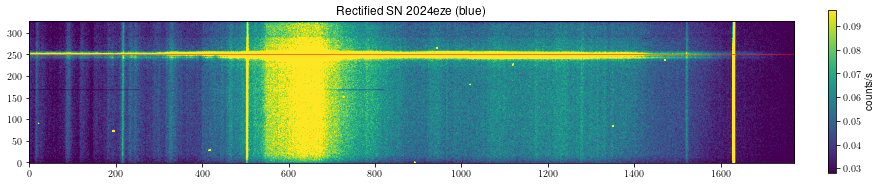

In [162]:
# apply step #1-4 from "Rectify blue" section
science_blue_rectified = util.rectify_frame(
    science_master_blue.T, trace_y_B, y_bound_upper_B, y_bound_lower_B
    )[:, x_trim_mask_B][:,::-1]

util.plot_frame2(science_blue_rectified, label='counts/s', title='Rectified SN 2024eze (blue)', prange=prange_R)
plt.axhline(trace_y_idx_B, color='r', linewidth=0.5)

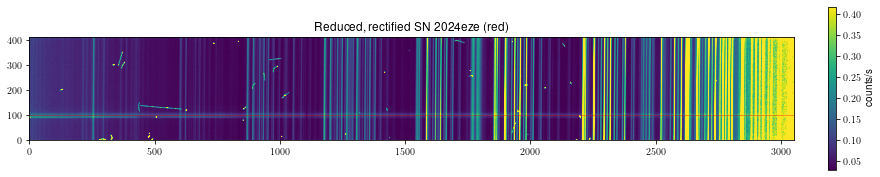

In [179]:
reduced_rect_science_R = science_red_rectified / normalised_flat_R
util.plot_frame2(reduced_rect_science_R, label='counts/s', title='Reduced, rectified SN 2024eze (red)', prange=prange_R)
plt.axhline(trace_y_idx_R+8, color='r', linewidth=0.5, alpha=0.7)

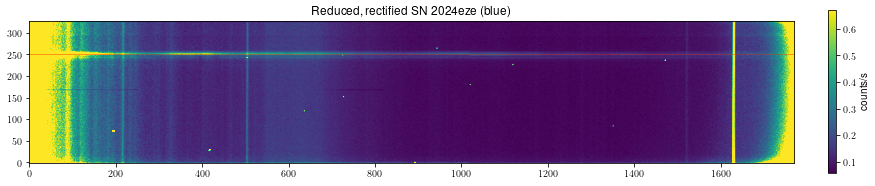

In [164]:
reduced_rect_science_B = science_blue_rectified / normalised_flat_B

util.plot_frame2(reduced_rect_science_B, label='counts/s', title='Reduced, rectified SN 2024eze (blue)', prange=prange_B)
plt.axhline(trace_y_idx_B, color='r', linewidth=0.5, alpha=0.7)

### Extract source and background
#### Red

In [169]:
row_summed_science_R = np.sum(reduced_rect_science_R, axis=1)
np.argmax(row_summed_science_R), trace_y_idx_R

(101, 90)

(600.0, 1200.0)

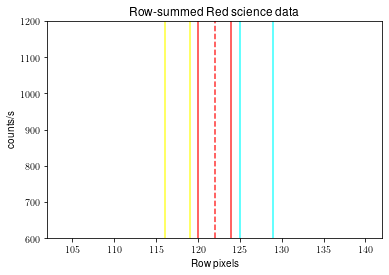

In [170]:
sci_aperture_idx_R = (122-2, 122+2)
sci_bg_upper_idx_R = (sci_aperture_idx_R[1]+1, sci_aperture_idx_R[1]+5)
sci_bg_lower_idx_R = (sci_aperture_idx_R[0]-4, sci_aperture_idx_R[0]-1)

plt.plot(row_summed_science_R, marker='o')
plt.title('Row-summed Red science data')
plt.xlabel('Row pixels')
plt.ylabel('counts/s')

plt.axvline(122, color='r', linestyle='--', alpha=0.8)
plt.axvline(sci_aperture_idx_R[0], color='r', alpha=0.8)
plt.axvline(sci_aperture_idx_R[1], color='r', alpha=0.8)
plt.axvline(sci_bg_upper_idx_R[0], color='cyan', alpha=0.8)
plt.axvline(sci_bg_upper_idx_R[1], color='cyan', alpha=0.8)
plt.axvline(sci_bg_lower_idx_R[0], color='yellow', alpha=0.8)
plt.axvline(sci_bg_lower_idx_R[1], color='yellow', alpha=0.8)

plt.xlim(122-20, 122+20)
plt.ylim(600, 1200)

(413,)

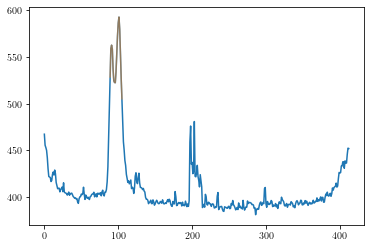

In [171]:
# TODO: try sigma clip
from astropy.stats import sigma_clip


plt.plot(row_summed_science_R)

filtered_data = sigma_clip(row_summed_science_R, sigma_upper=np.inf, sigma_lower=0.05)
plt.plot(filtered_data, alpha=0.5)

filtered_data.shape

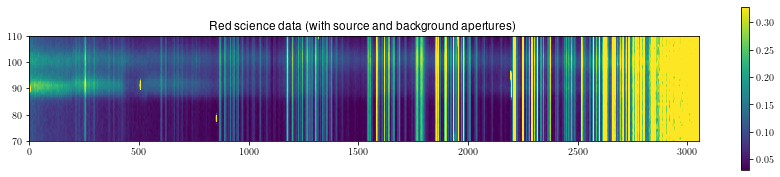

In [172]:
util.plot_frame(reduced_rect_science_R, prange=(10, 90), aspect=12)
plt.title('Red science data (with source and background apertures)')

plt.axhline(y=sci_aperture_idx_R[0], color='r', alpha=0.5)
plt.axhline(y=sci_aperture_idx_R[1], color='r', alpha=0.5)


plt.axhline(sci_bg_upper_idx_R[0], color='cyan', alpha=0.8)
plt.axhline(sci_bg_upper_idx_R[1], color='cyan', alpha=0.8)
plt.axhline(sci_bg_lower_idx_R[0], color='yellow', alpha=0.8)
plt.axhline(sci_bg_lower_idx_R[1], color='yellow', alpha=0.8)

plt.ylim(trace_y_idx_R - 20,trace_y_idx_R + 20); 

Text(0.5, 1.0, 'SN 2024eze spectrum w/ Background (RED)')

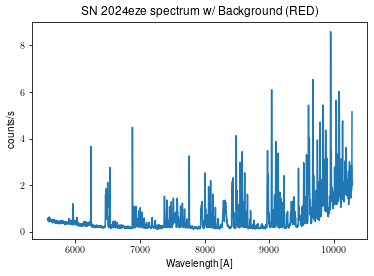

In [173]:
sci_source_spec_R = np.sum(reduced_rect_science_R[sci_aperture_idx_R[0] : sci_aperture_idx_R[1]+1], axis=0)

plt.plot(wvl_range_R, sci_source_spec_R)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze spectrum w/ Background (RED)')

Text(0.5, 1.0, 'SN 2024eze background (RED)')

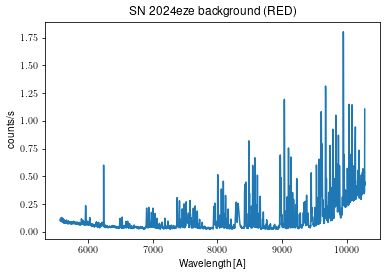

In [174]:
sci_bg_spec_R = np.median(np.concatenate((
    reduced_rect_science_R[sci_bg_lower_idx_R[0]: sci_bg_lower_idx_R[1]+1],
    reduced_rect_science_R[sci_bg_upper_idx_R[0]: sci_bg_upper_idx_R[1]+1]),
    axis=0), axis=0)

plt.plot(wvl_range_R, sci_bg_spec_R)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze background (RED)')

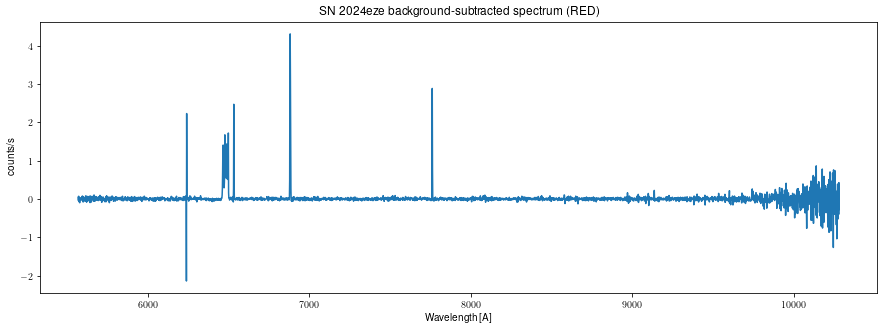

In [175]:
plt.figure(figsize=(15, 5))
sci_aperture_nrows_R = sci_aperture_idx_R[1] - sci_aperture_idx_R[0]+1
science_spectrum_R = sci_source_spec_R - (sci_bg_spec_R * sci_aperture_nrows_R)

plt.plot(wvl_range_R, science_spectrum_R)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze background-subtracted spectrum (RED)');

##### Median subtraction

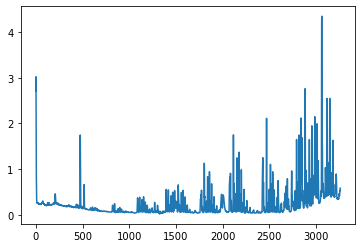

In [448]:
colwise_median_R = np.median(reduced_rect_science_R, axis=0)
plt.plot(colwise_median_R)

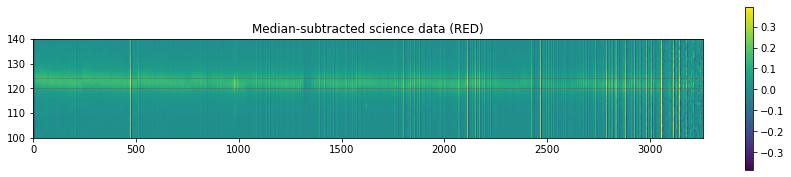

In [449]:
median_subtracted_science_R = reduced_rect_science_R-colwise_median_R
util.plot_frame(median_subtracted_science_R, prange=(1, 99), aspect=12)
plt.title('Median-subtracted science data (RED)')


plt.axhline(y=sci_aperture_idx_R[0], color='r', alpha=0.5, lw=.5)
plt.axhline(y=sci_aperture_idx_R[1], color='r', alpha=0.5, lw=.5)


# plt.axhline(sci_bg_upper_idx_R[0], color='cyan', alpha=0.8)
# plt.axhline(sci_bg_upper_idx_R[1], color='cyan', alpha=0.8)
# plt.axhline(sci_bg_lower_idx_R[0], color='yellow', alpha=0.8)
# plt.axhline(sci_bg_lower_idx_R[1], color='yellow', alpha=0.8)

plt.ylim(trace_y_idx_R - 20,trace_y_idx_R + 20); 

Text(0.5, 1.0, 'SN 2024eze median subtracted spectrum (RED)')

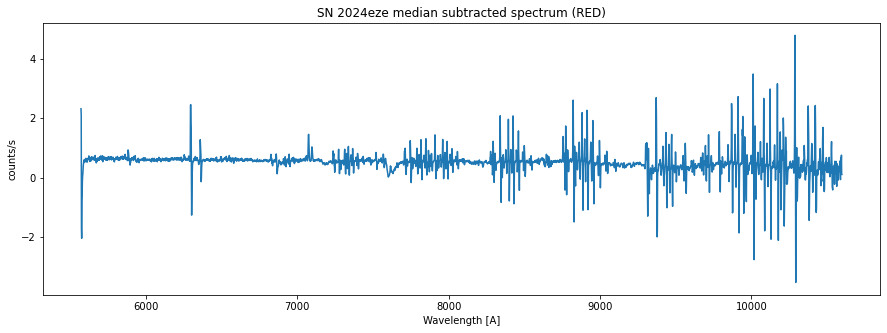

In [450]:
plt.figure(figsize=(15, 5))
sci_source_spec_R1 = np.sum(median_subtracted_science_R[sci_aperture_idx_R[0] : sci_aperture_idx_R[1]+1], axis=0)

plt.plot(wvl_range_R, sci_source_spec_R1)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze median subtracted spectrum (RED)')

#### Blue

In [451]:
row_summed_science_B = np.sum(reduced_rect_science_B, axis=1)
np.argmax(row_summed_science_B), trace_y_idx_B

(197, 200)

(177.0, 217.0)

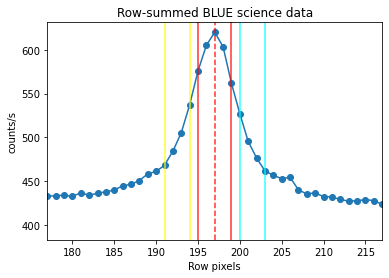

In [452]:
sci_aperture_idx_B = (197-2, 197+2)
sci_bg_upper_idx_B = (sci_aperture_idx_B[1]+1, sci_aperture_idx_B[1]+4)
sci_bg_lower_idx_B = (sci_aperture_idx_B[0]-4, sci_aperture_idx_B[0]-1)

plt.plot(row_summed_science_B, marker='o')
plt.title('Row-summed BLUE science data')
plt.xlabel('Row pixels')
plt.ylabel('counts/s')


plt.axvline(trace_y_idx_B-3, color='r', linestyle='--', alpha=0.8)
plt.axvline(sci_aperture_idx_B[0], color='r', alpha=0.8)
plt.axvline(sci_aperture_idx_B[1], color='r', alpha=0.8)
plt.axvline(sci_bg_upper_idx_B[0], color='cyan', alpha=0.8)
plt.axvline(sci_bg_upper_idx_B[1], color='cyan', alpha=0.8)
plt.axvline(sci_bg_lower_idx_B[0], color='yellow', alpha=0.8)
plt.axvline(sci_bg_lower_idx_B[1], color='yellow', alpha=0.8)

plt.xlim(197-20, 197+20)

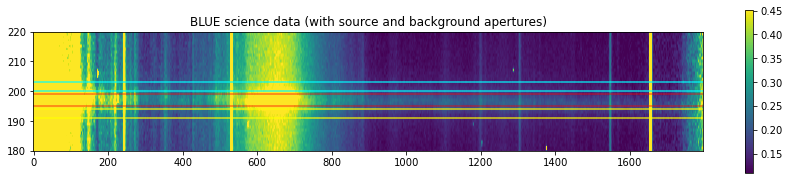

In [453]:
util.plot_frame(reduced_rect_science_B, prange=(8, 92), aspect=8)
plt.title('BLUE science data (with source and background apertures)')

plt.axhline(y=sci_aperture_idx_B[0], color='r', alpha=0.5)
plt.axhline(y=sci_aperture_idx_B[1], color='r', alpha=0.5)
plt.axhline(sci_bg_upper_idx_B[0], color='cyan', alpha=0.8)
plt.axhline(sci_bg_upper_idx_B[1], color='cyan', alpha=0.8)
plt.axhline(sci_bg_lower_idx_B[0], color='yellow', alpha=0.8)
plt.axhline(sci_bg_lower_idx_B[1], color='yellow', alpha=0.8)

plt.ylim(trace_y_idx_B - 20,trace_y_idx_B + 20); 

Text(0.5, 1.0, 'SN 2024eze spectrum w/ Background (BLUE)')

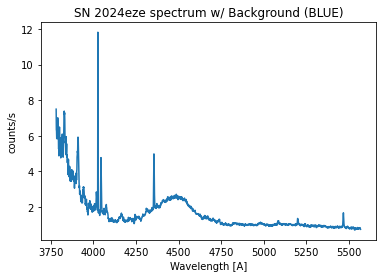

In [454]:
sci_source_spec_B = np.sum(
    reduced_rect_science_B[sci_aperture_idx_B[0] : sci_aperture_idx_B[1]+1, :end_idx_B], 
    axis=0)

plt.plot(wvl_range_B_trunc, sci_source_spec_B)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze spectrum w/ Background (BLUE)')

Text(0.5, 1.0, 'SN 2024eze background (BLUE)')

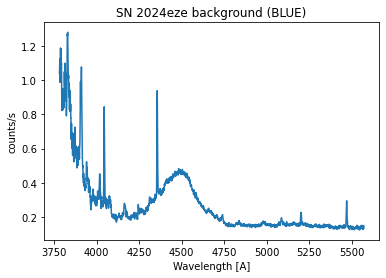

In [455]:
sci_bg_spec_B = np.median(np.concatenate((
    reduced_rect_science_B[sci_bg_lower_idx_B[0]: sci_bg_lower_idx_B[1]+1],
    reduced_rect_science_B[sci_bg_upper_idx_B[0]: sci_bg_upper_idx_B[1]+1]),
    axis=0)[:, :end_idx_B], axis=0)

plt.plot(wvl_range_B_trunc, sci_bg_spec_B)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze background (BLUE)')

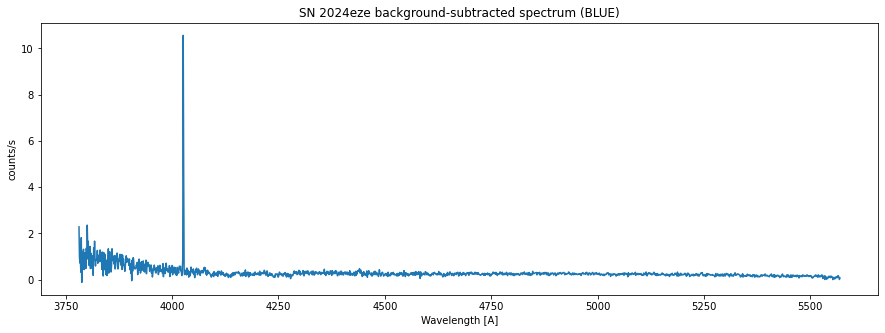

In [456]:
sci_aperture_nrows_B = sci_aperture_idx_B[1] - sci_aperture_idx_B[0]+1
science_spectrum_B = sci_source_spec_B - (sci_bg_spec_B * sci_aperture_nrows_B)

plt.figure(figsize=(15, 5))
plt.plot(wvl_range_B_trunc, science_spectrum_B)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze background-subtracted spectrum (BLUE)');

##### Median subtraction

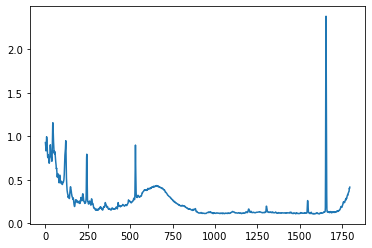

In [457]:
colwise_median_B = np.median(reduced_rect_science_B, axis=0)
plt.plot(colwise_median_B)

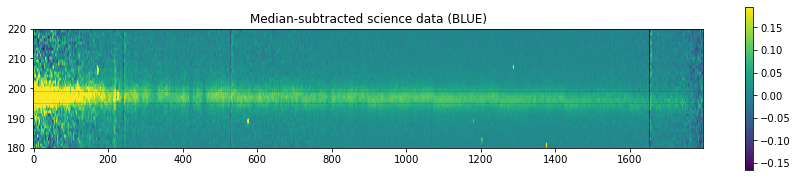

In [458]:
median_subtracted_science_B = reduced_rect_science_B-colwise_median_B
util.plot_frame(median_subtracted_science_B, prange=(0.5, 99.5), aspect=8)
plt.title('Median-subtracted science data (BLUE)')

plt.axhline(y=sci_aperture_idx_B[0], color='r', alpha=0.5, lw=.5)
plt.axhline(y=sci_aperture_idx_B[1], color='r', alpha=0.5, lw=.5)
# plt.axhline(sci_bg_upper_idx_B[0], color='cyan', alpha=0.8)
# plt.axhline(sci_bg_upper_idx_B[1], color='cyan', alpha=0.8)
# plt.axhline(sci_bg_lower_idx_B[0], color='yellow', alpha=0.8)
# plt.axhline(sci_bg_lower_idx_B[1], color='yellow', alpha=0.8)
plt.ylim(trace_y_idx_B - 20,trace_y_idx_B + 20);

Text(0.5, 1.0, 'SN 2024eze median-subtracted spectrum (BLUE)')

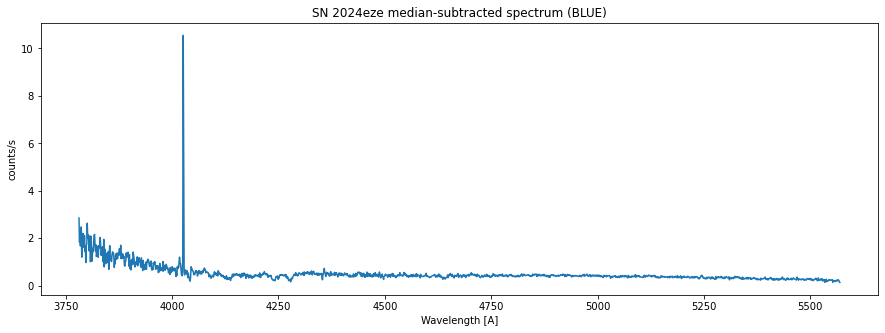

In [459]:
sci_source_spec_B1 = np.sum(
    median_subtracted_science_B[sci_aperture_idx_B[0] : sci_aperture_idx_B[1]+1, :end_idx_B], 
    axis=0)

plt.figure(figsize=(15, 5))
plt.plot(wvl_range_B_trunc, sci_source_spec_B1)
plt.ylabel('counts/s')
plt.xlabel('Wavelength [A]')
plt.title('SN 2024eze median-subtracted spectrum (BLUE)')

### Calibrate combined spectrum

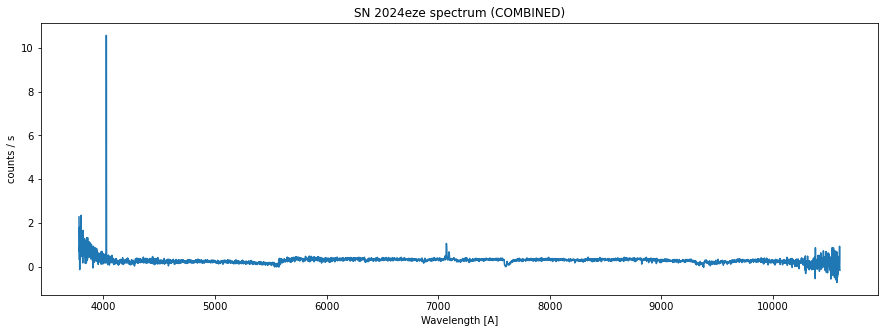

In [460]:
science_spectrum_combined = np.hstack([science_spectrum_B, science_spectrum_R]) * u.Unit('count/s')

plt.figure(figsize=(15, 5))
plt.plot(wvl_solution, science_spectrum_combined)
plt.xlabel("Wavelength [A]")
plt.ylabel("counts / s")
plt.title("SN 2024eze spectrum (COMBINED)");

In [461]:
science_spectrum_calibrated = science_spectrum_combined * calibration_flux
science_spectrum_calibrated

<Quantity [ 4.94192900e-17,  2.19554806e-17,  1.70686270e-17, ...,
            1.49236182e-16,  9.61912264e-18, -1.07831725e-17] erg / (Angstrom cm2 s)>

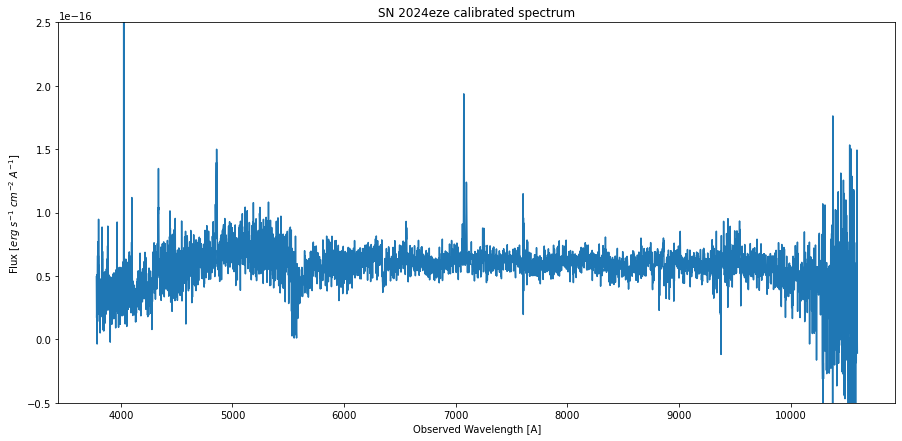

In [462]:
plt.figure(figsize=(15, 7))
plt.plot(wvl_solution, science_spectrum_calibrated)

plt.ylim(-0.5e-16, 2.5e-16)
plt.xlabel("Observed Wavelength [A]")
plt.ylabel("Flux [$erg\ s^{-1}\ cm^{-2}\ A^{-1}$]")
plt.title("SN 2024eze calibrated spectrum");

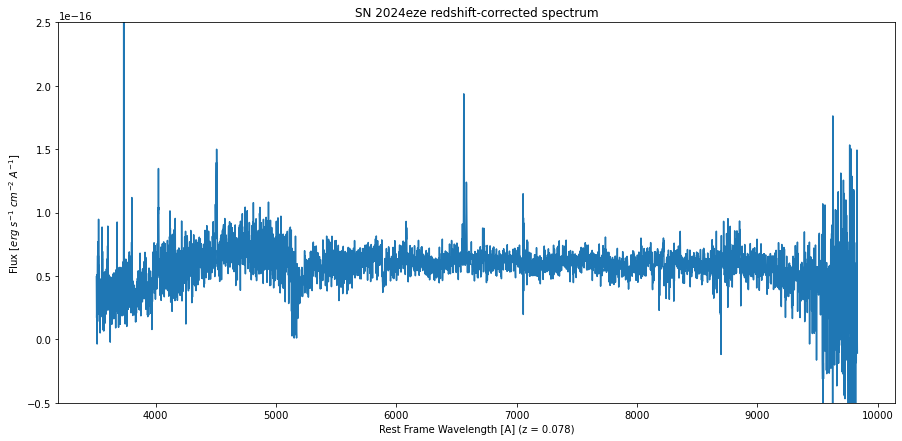

In [463]:
z=0.078
wvl_solution_redshifted = wvl_solution / (1+ z)
plt.figure(figsize=(15, 7))
plt.plot(wvl_solution_redshifted, science_spectrum_calibrated)

plt.ylim(-0.5e-16, 2.5e-16)
plt.xlabel("Rest Frame Wavelength [A] (z = 0.078)")
plt.ylabel("Flux [$erg\ s^{-1}\ cm^{-2}\ A^{-1}$]")
plt.title("SN 2024eze redshift-corrected spectrum");

#### Median subtracted combination

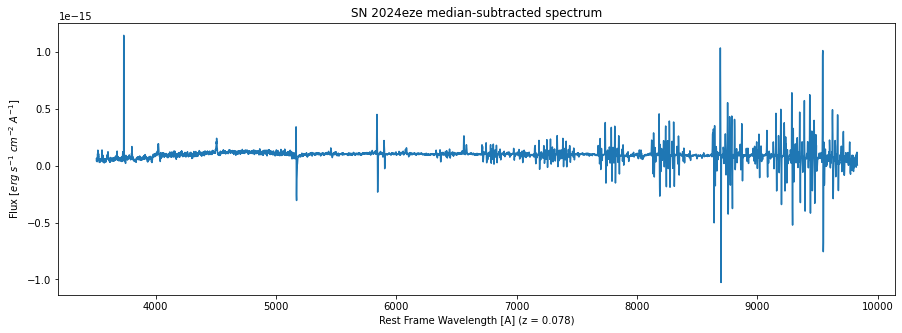

In [464]:
science_spectrum_wo_median = np.hstack([sci_source_spec_B1, sci_source_spec_R1]) * u.Unit('count/s') * calibration_flux

plt.figure(figsize=(15, 5))
plt.plot(wvl_solution_redshifted, science_spectrum_wo_median)
plt.xlabel("Rest Frame Wavelength [A] (z = 0.078)")
plt.ylabel("Flux [$erg\ s^{-1}\ cm^{-2}\ A^{-1}$]")
plt.title("SN 2024eze median-subtracted spectrum");

## Data Analysis

In [465]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch


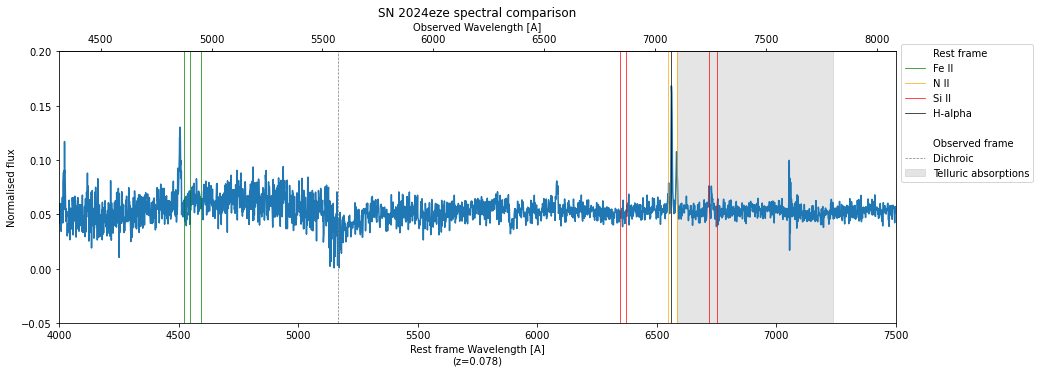

In [466]:
science_spectrum_calibrated_norm = science_spectrum_calibrated.value / np.max(science_spectrum_calibrated.value)


fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(wvl_solution_redshifted, science_spectrum_calibrated_norm, 
         label='2024-05-04 (rest frame, z=0.078)')

ax1.set_xlabel("Rest frame Wavelength [A]\n(z=0.078)")
ax1.set_ylabel("Normalised flux")
ax1.set_title("SN 2024eze spectral comparison")

ax2 = ax1.secondary_xaxis('top', functions=( lambda x: x * (1 +z), lambda x: x / (1 +z)))
ax2.set_xlabel("Observed Wavelength [A]")
y_upper_bound = 0.2


lines = {
    4523: "Fe II", 4550: "Fe II", 4594: "Fe II",
    6347: "Si II", 6371: "Si II",
    6560: "H-alpha",
    6548: 'N II', 6584: "N II",
    6717: 'Si II', 6750: 'Si II'
    }

line_kwargs = {
    'Fe II': dict(linestyle='-', linewidth=.7, color='green'),
    'N II': dict(linestyle='-', linewidth=.7, color='orange'),
    'Si II': dict(linestyle='-', linewidth=.7, color='red'),
    'H-alpha': dict(linestyle='-', linewidth=.7, color='black'),
}

line_kwarg_obs = dict(linestyle='--', linewidth=.7, color='grey')

for line in lines.keys():
    ax1.axvline(x=line, label=lines[line], **line_kwargs[lines[line]])
    # ax1.text(line-40, y_upper_bound-0.1, lines[line], ha='center', va='center', rotation='vertical',color='red')
    
legend_elements_rest = [Line2D([0], [0], label=species, **line_kwarg)
                   for species, line_kwarg in line_kwargs.items()]

ax1.axvline(x=wvl_range_B[end_idx_B]/(1+z), **line_kwarg_obs)
ax1.axvspan(7100/(1+z), 7800/(1+z), color='gray', alpha=0.2)

ax1.legend(handles=[Patch(color='none', label='Rest frame')]
           +legend_elements_rest
           +[Patch(color='none', label=''),
             Patch(color='none', label='Observed frame'),
             Line2D([0], [0], label='Dichroic', **line_kwarg_obs),
             Patch(color='gray', alpha=0.2, label='Telluric absorptions')
            ]
           ,loc='lower left', bbox_to_anchor=(1, 0.5))


ax1.set_xlim(4000, 7500)
ax1.set_ylim(-0.05, y_upper_bound);


In [467]:
tns_data = pd.read_csv('tns_2024eze_2024-04-12_11-13-24_P200_DBSP_ZTF.ascii',
                        sep='\t',
                        na_values=['None'],
                        names=['wavelength', 'flux'],
                        dtype={'wavelength': 'float64', 'flux': 'float64'})
tns_data

wavelength     flux
0         3400.2  11.7570
1         3401.2  14.5570
2         3402.3  13.6740
3         3403.4  12.9680
4         3404.4   8.0631
...          ...      ...
5225     10492.0  -1.9583
5226     10494.0  25.2250
5227     10495.0  37.1320
5228     10497.0   2.4639
5229     10498.0  19.9950

[5230 rows x 2 columns]

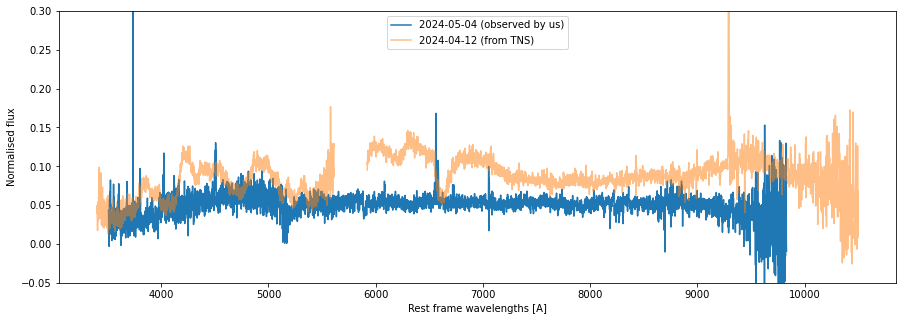

In [468]:
plt.figure(figsize=(15, 5))
plt.plot(wvl_solution_redshifted, science_spectrum_calibrated_norm, 
         label='2024-05-04 (observed by us)')
plt.plot(tns_data.wavelength, tns_data.flux/np.max(tns_data.flux), 
         label='2024-04-12 (from TNS)', alpha=0.5)
plt.xlabel('Rest frame wavelengths [A]')
plt.ylabel('Normalised flux')
plt.ylim(-0.05, 0.3)
plt.legend(loc='upper center');

### Line identification

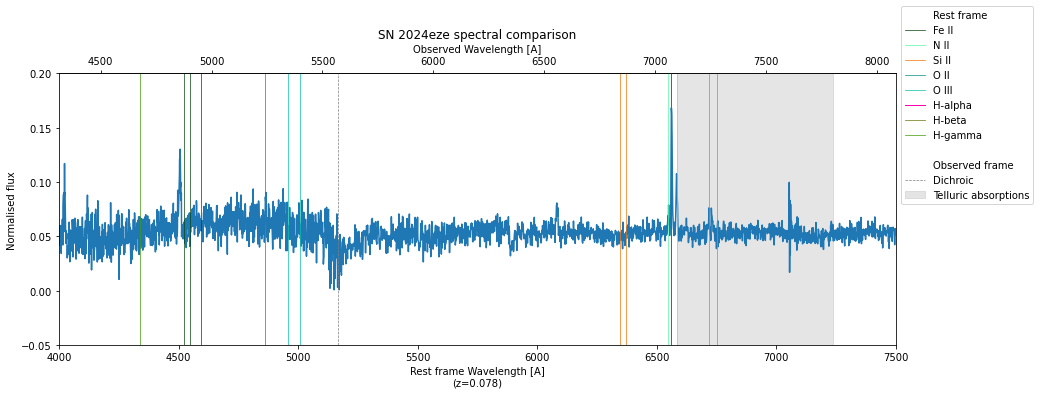

In [469]:
science_spectrum_calibrated_norm = science_spectrum_calibrated.value / np.max(science_spectrum_calibrated.value)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(wvl_solution_redshifted, science_spectrum_calibrated_norm, 
         label='2024-05-04 (rest frame, z=0.078)')

ax1.set_xlabel("Rest frame Wavelength [A]\n(z=0.078)")
ax1.set_ylabel("Normalised flux")
ax1.set_title("SN 2024eze spectral comparison")

ax2 = ax1.secondary_xaxis('top', functions=( lambda x: x * (1 +z), lambda x: x / (1 +z)))
ax2.set_xlabel("Observed Wavelength [A]")
y_upper_bound = 0.2


lines = {
    3737: "O II",
    4523: "Fe II", 4550: "Fe II", 4594: "Fe II",
    4340: "H-gamma", 4861: "H-beta", 6560: "H-alpha",
    4959: "O III", 5007: "O III",
    6347: "Si II", 6371: "Si II",
    6548: 'N II', 6584: "N II",
    6717: 'Si II', 6750: 'Si II'
    }

line_kwargs = {
    'Fe II': dict(linestyle='-', linewidth=.7, color='#06470c'),
    'N II': dict(linestyle='-', linewidth=.7, color='#53fca1'),
    'Si II': dict(linestyle='-', linewidth=.7, color='#f97306'),
    "O II": dict(linestyle='-', linewidth=.7, color='#029386'),
    "O III": dict(linestyle='-', linewidth=.7, color='#06c2ac'),
    'H-alpha': dict(linestyle='-', linewidth=1, color='#fe01b1'),
    'H-beta': dict(linestyle='-', linewidth=.7, color='#6e750e'),
    'H-gamma': dict(linestyle='-', linewidth=.7, color='#3f9b0b')
}

line_kwarg_obs = dict(linestyle='--', linewidth=.7, color='grey')

for line in lines.keys():
    ax1.axvline(x=line, label=lines[line], **line_kwargs[lines[line]])
    # ax1.text(line-40, y_upper_bound-0.1, lines[line], ha='center', va='center', rotation='vertical',color='red')
    
legend_elements_rest = [Line2D([0], [0], label=species, **line_kwarg)
                   for species, line_kwarg in line_kwargs.items()]

ax1.axvline(x=wvl_range_B[end_idx_B]/(1+z), **line_kwarg_obs)
ax1.axvspan(7100/(1+z), 7800/(1+z), color='gray', alpha=0.2)

ax1.legend(handles=[Patch(color='none', label='Rest frame')]
           +legend_elements_rest
           +[Patch(color='none', label=''),
             Patch(color='none', label='Observed frame'),
             Line2D([0], [0], label='Dichroic', **line_kwarg_obs),
             Patch(color='gray', alpha=0.2, label='Telluric absorptions')
            ]
           ,loc='lower left', bbox_to_anchor=(1, 0.5))


ax1.set_xlim(4000, 7500)
ax1.set_ylim(-0.05, y_upper_bound);
